In [8]:
%matplotlib notebook
#%matplotlib inline
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(1234)
from astropy.io import fits
import astropy.units as u
import pandas as pd
from astropy.table import Table
from matplotlib import colors,cm

In [2]:
# Loading BAT data of Vela X-1 and looking info
vela_file = 'data/bat_Vela_X-1_lc-8.fits'
fits.info(vela_file)

Filename: data/bat_Vela_X-1_lc-8.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GNRL-SRC.-LCR    1 BinTableHDU     61   60159R x 5C   [1D, 1D, 1E, 1E, 1E]   


In [9]:
# See HEADER file for further info
hdu = fits.open(vela_file)
hdu[1].header

XTENSION= 'BINTABLE'           / Binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   28 / width of table in bytes                        
NAXIS2  =                60159 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'TIME    '           / Time of measurement for the bin                
TFORM1  = '1D      '           / Format of column TIME                          
TTYPE2  = 'TIMEDEL '           / Time bin size                                  
TFORM2  = '1D      '           / Format of column TIMEDEL                       
TTYPE3  = 'RATE    '        

In [10]:
# LOAD data with PANDAS and look at the EVENT table
vela_ft = fits.open(vela_file)[1].data
vela = Table.read(vela_file).to_pandas()
vela

TIME   TIMEDEL      RATE     ERROR   FRACEXP
0      53372.581892  0.018924  0.007041  0.000352  0.351864
1      53372.630028  0.004132  0.014340  0.000551  0.519747
2      53372.695937  0.004167  0.016943  0.000599  0.469227
3      53372.764988  0.001991  0.011762  0.000820  0.508523
4      53372.836238  0.002824  0.016876  0.000686  0.503865
...             ...       ...       ...       ...       ...
60154  58269.743709  0.005799  0.003087  0.001022  0.254512
60155  58269.810497  0.003472  0.005071  0.000936  0.558685
60156  58269.816573  0.001736  0.006453  0.001358  0.558717
60157  58269.882349  0.011852  0.005826  0.000599  0.512996
60158  58269.950156  0.008183  0.006149  0.000662  0.545433

[60159 rows x 5 columns]

In [11]:
# Some statistical vaues (# events, min, max, mean, std, ...)
vela.describe()

TIME       TIMEDEL          RATE         ERROR       FRACEXP
count  60159.000000  60159.000000  60159.000000  60159.000000  60159.000000
mean   55863.946619      0.009005      0.007587      0.001110      0.459541
std     1388.843565      0.005503      0.007644      0.001216      0.312041
min    53372.581892      0.001586     -0.041339      0.000157      0.004989
25%    54718.735208      0.004514      0.002461      0.000434      0.172411
50%    55841.274131      0.007928      0.006285      0.000682      0.432529
75%    57040.589499      0.012188      0.010476      0.001269      0.720566
max    58269.950156      0.030706      0.108992      0.024185      1.166350

<IPython.core.display.Javascript object>


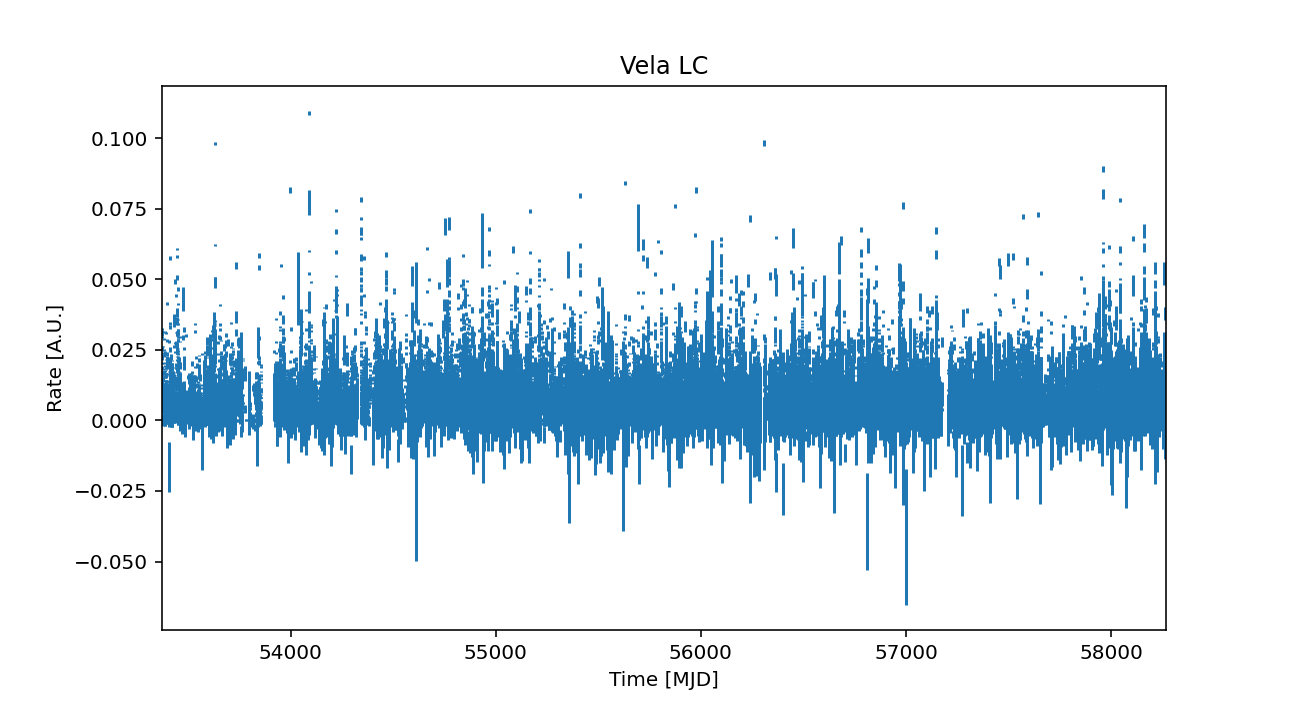

<ErrorbarContainer object of 3 artists>

In [12]:
# Plot LC
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set_title('Vela LC')
ax.set_xlabel('Time [MJD]')
ax.set_ylabel('Rate [A.U.]')
ax.set_xlim(vela['TIME'].min(),vela['TIME'].max())
ax.errorbar(vela['TIME'],vela['RATE'],xerr=0.5*vela['TIMEDEL']*vela['FRACEXP'],yerr=vela['ERROR'],label='Vela X-1',ls='')
#ax.errorbar(vela['TIME'][vela['FRACEXP']>1],vela['RATE'][vela['FRACEXP']>1],xerr=0.5*vela['TIMEDEL'][vela['FRACEXP']>1]*vela['FRACEXP'][vela['FRACEXP']>1],yerr=vela['ERROR'][vela['FRACEXP']>1],label='FRACEXP>1',ls='')

<IPython.core.display.Javascript object>


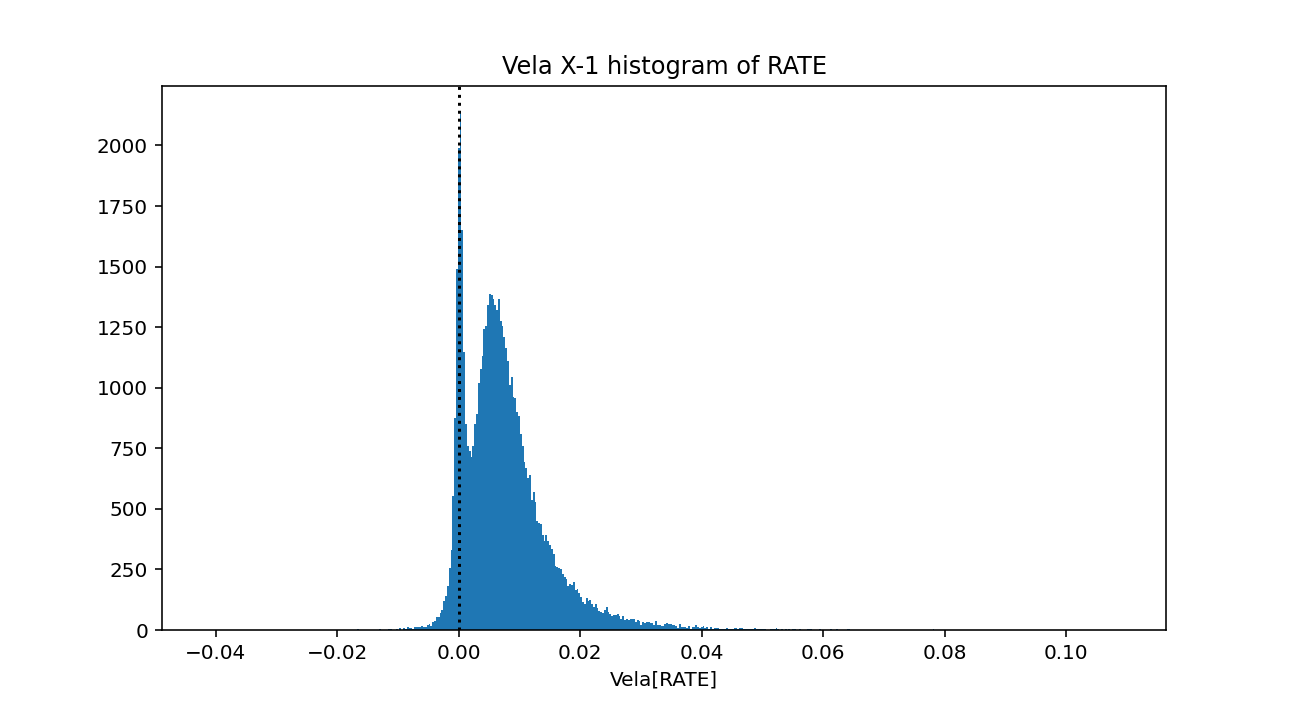

In [13]:
# Plot RATE histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set_title('Vela X-1 histogram of RATE')
ax.set_xlabel('Vela[RATE]')
ax.hist(vela['RATE'], bins=500)#, range=[-0.01,0.05])
ax.axvline(0,ls=':',color='k')

<IPython.core.display.Javascript object>


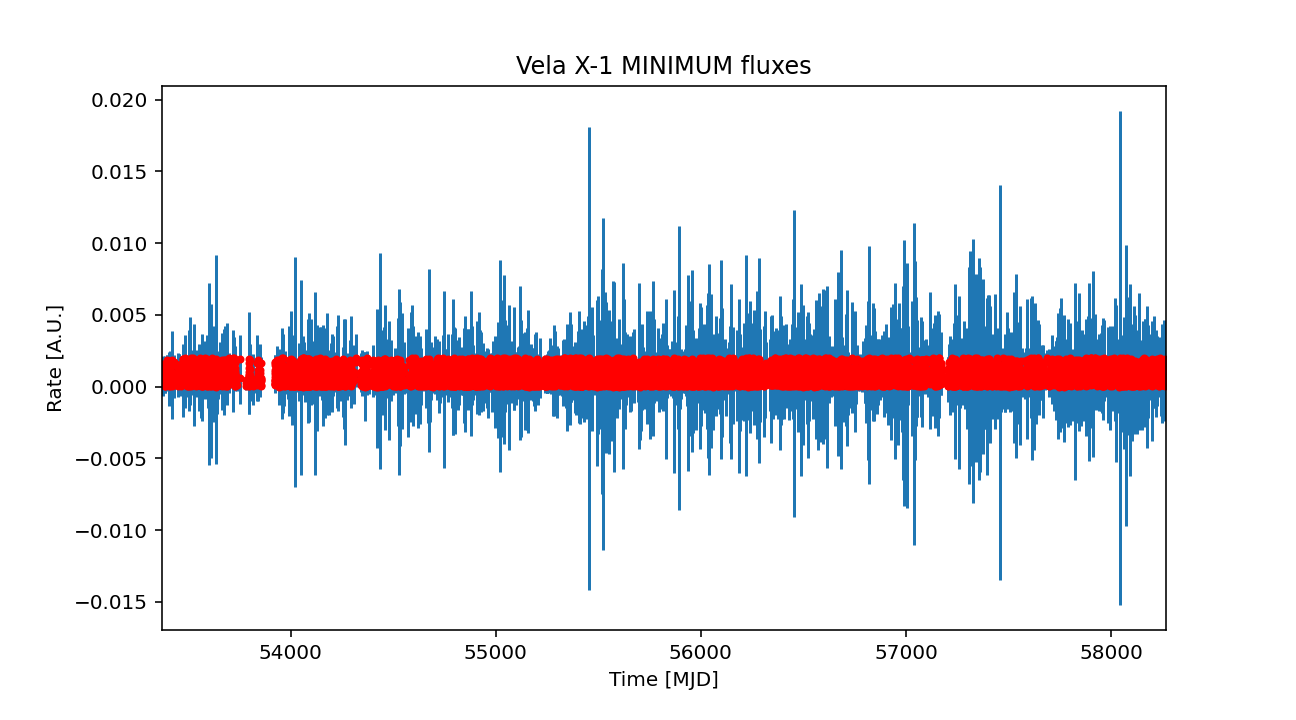

In [14]:
# Plot only events whose RATE is: 0 > RATE > 0.002
#vela[np.logical_and(vela['PHASE']>i/bin,vela['PHASE']<(i+1)/bin)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set_title('Vela X-1 MINIMUM fluxes')
ax.set_xlabel('Time [MJD]')
ax.set_ylabel('Rate [A.U.]')
ax.set_xlim(vela['TIME'].min(),vela['TIME'].max())
mask = np.logical_and(vela['RATE']>0,vela['RATE']<0.002)
ax.errorbar(vela['TIME'][mask],
            vela['RATE'][mask],
            xerr=0.5*vela['TIMEDEL'][mask]*vela['FRACEXP'][mask],
            yerr=vela['ERROR'][mask],
            label='Vela X-1',ls='')
ax.plot(vela['TIME'][mask],vela['RATE'][mask],ls='',marker='.',c='r')

## REFERENCES
1) N.R. Lomb “Least-squares frequency analysis of unequally spaced data”, Astrophysics and Space Science, vol 39, pp. 447-462, 1976

2) J.D. Scargle “Studies in astronomical time series analysis. II - Statistical aspects of spectral analysis of unevenly spaced data”, The Astrophysical Journal, vol 263, pp. 835-853, 1982

3) R.H.D. Townsend, “Fast calculation of the Lomb-Scargle periodogram using graphics processing units.”, The Astrophysical Journal Supplement Series, vol 191, pp. 247-253, 2010

<IPython.core.display.Javascript object>


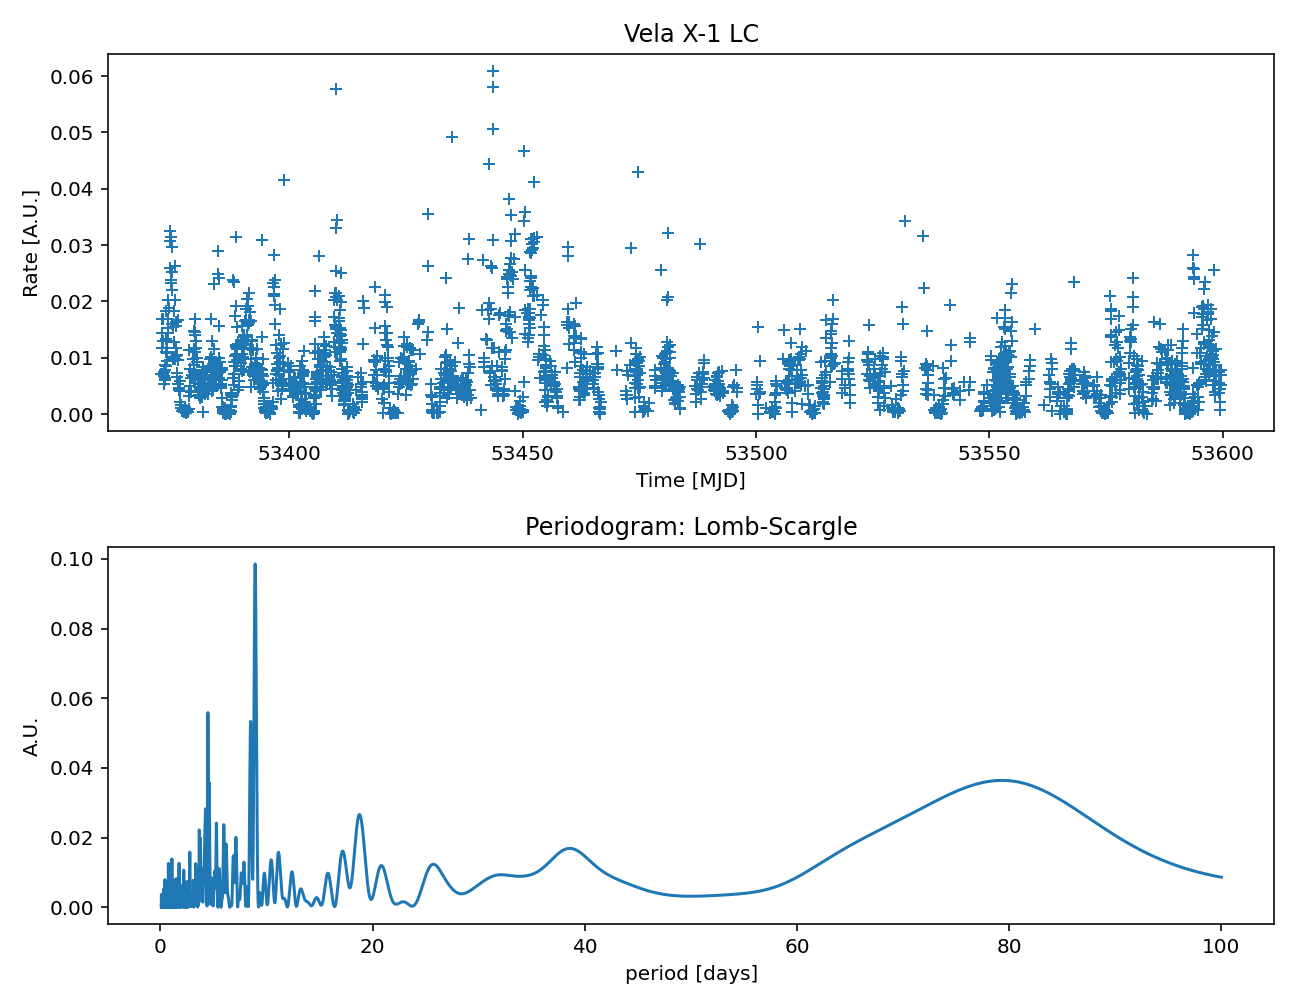

Best period = 8.93942351813576


In [15]:
# Looking for the PERIODICITY
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select a small TIME range and FILTER OUT negative values
mask = np.logical_and(vela['RATE']>0,vela['TIME']<53600)
x = vela['TIME'][mask]
y = vela['RATE'][mask]

# Define the array of frequencies for which to compute the periodogram:
nout=100000
period = np.logspace(-1, 2, nout) # from 0.1 day to 100 days
ang_freqs = 2 * np.pi / period

# Calculate Lomb-Scargle periodogram:
# (weak periodic signal with unven sampling)
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

#Now make a plot of the input data:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')

#Then plot the normalized periodogram:
ax[1].plot(period, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')
for i,j in zip(period,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

<IPython.core.display.Javascript object>


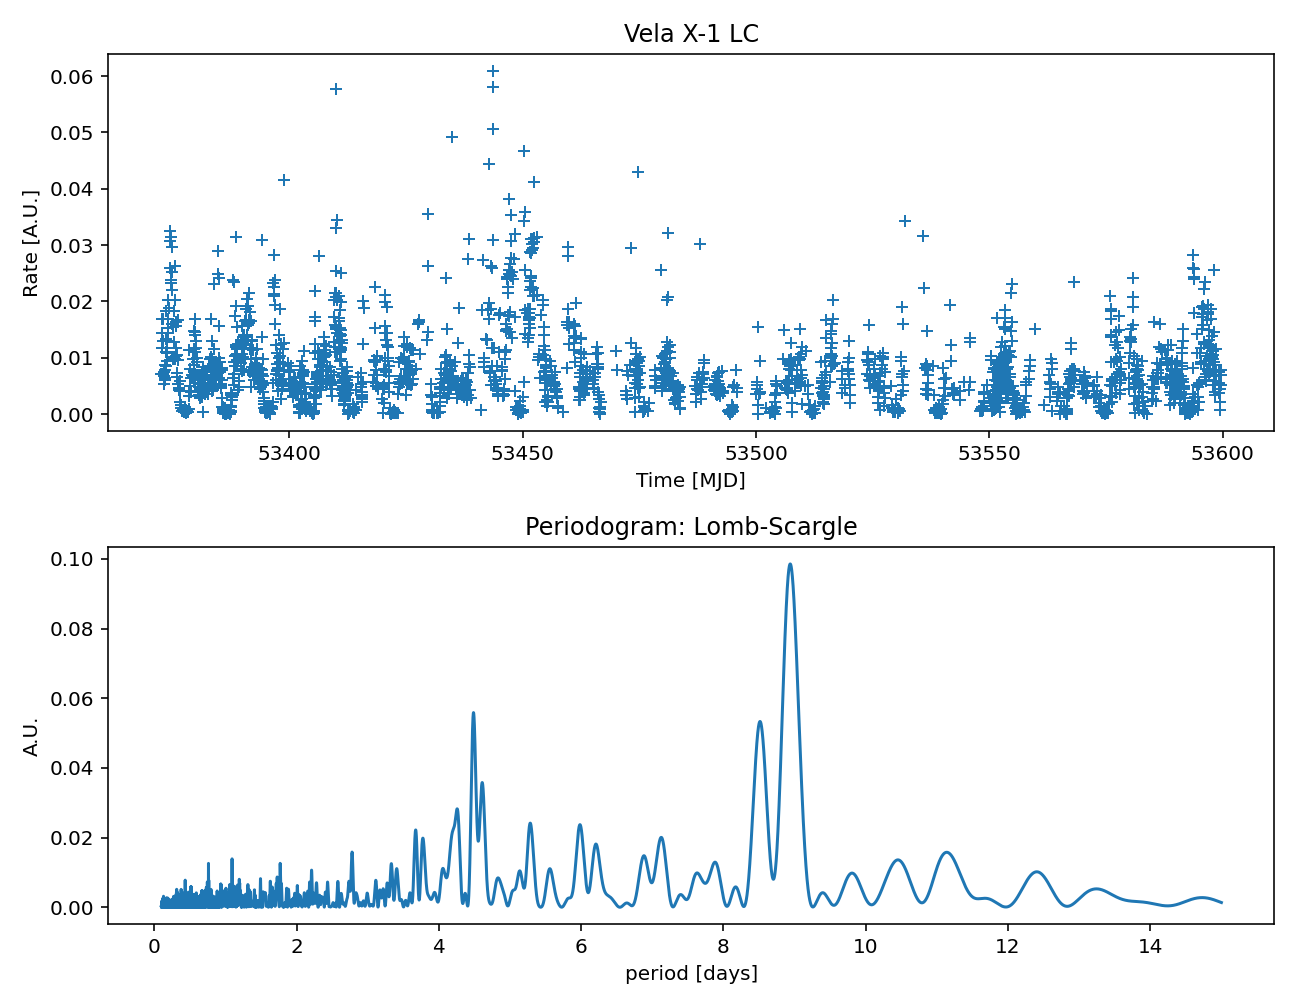

Best period = 8.939215392153923


In [16]:
# Refine search with SMALLE LINEAR range PERIOD: 0-15 days
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Define the array of frequencies for which to compute the periodogram:
p = np.linspace(0.1, 15, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

<IPython.core.display.Javascript object>


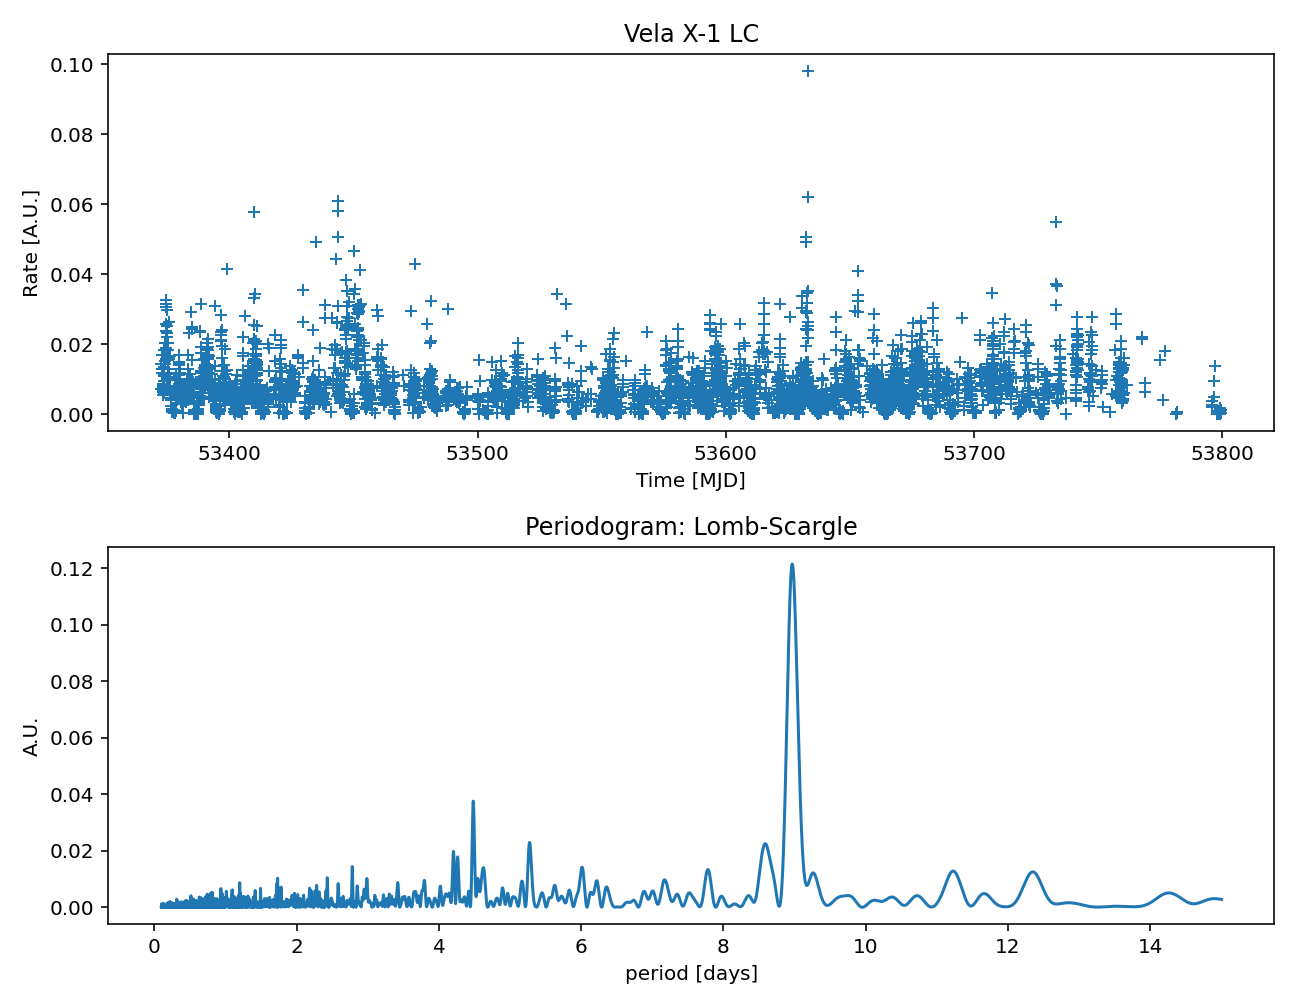

Best period = 8.967823678236783


In [17]:
'''
# Use a LARGER sample of data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select TIME range and FILTER OUT negative values
tmax = 53800
mask = np.logical_and(vela['RATE']>0,vela['TIME']<tmax)
x = vela['TIME'][mask]
y = vela['RATE'][mask]

# Define the array of frequencies for which to compute the periodogram:
nout=100000
p = np.linspace(0.1, 15, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()
'''

In [ ]:
'''
# Use ALL available data: VERY SLOW
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select TIME range and FILTER OUT negative values
tmax = vela['TIME'].max()
mask = np.logical_and(vela['RATE']>0,vela['TIME']<tmax)
x = vela['TIME'][mask]
y = vela['RATE'][mask]

# Define the array of frequencies for which to compute the periodogram:
nout=100000
p = np.linspace(0.1, 15, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y-y.mean(), ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [MJD]',ylabel='Rate [A.U.]',title='Vela X-1 LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [days]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()
'''

## Determination of period and amplitude from epoch folding

https://ui.adsabs.harvard.edu/abs/1987A%26A...180..275L/abstract

<IPython.core.display.Javascript object>


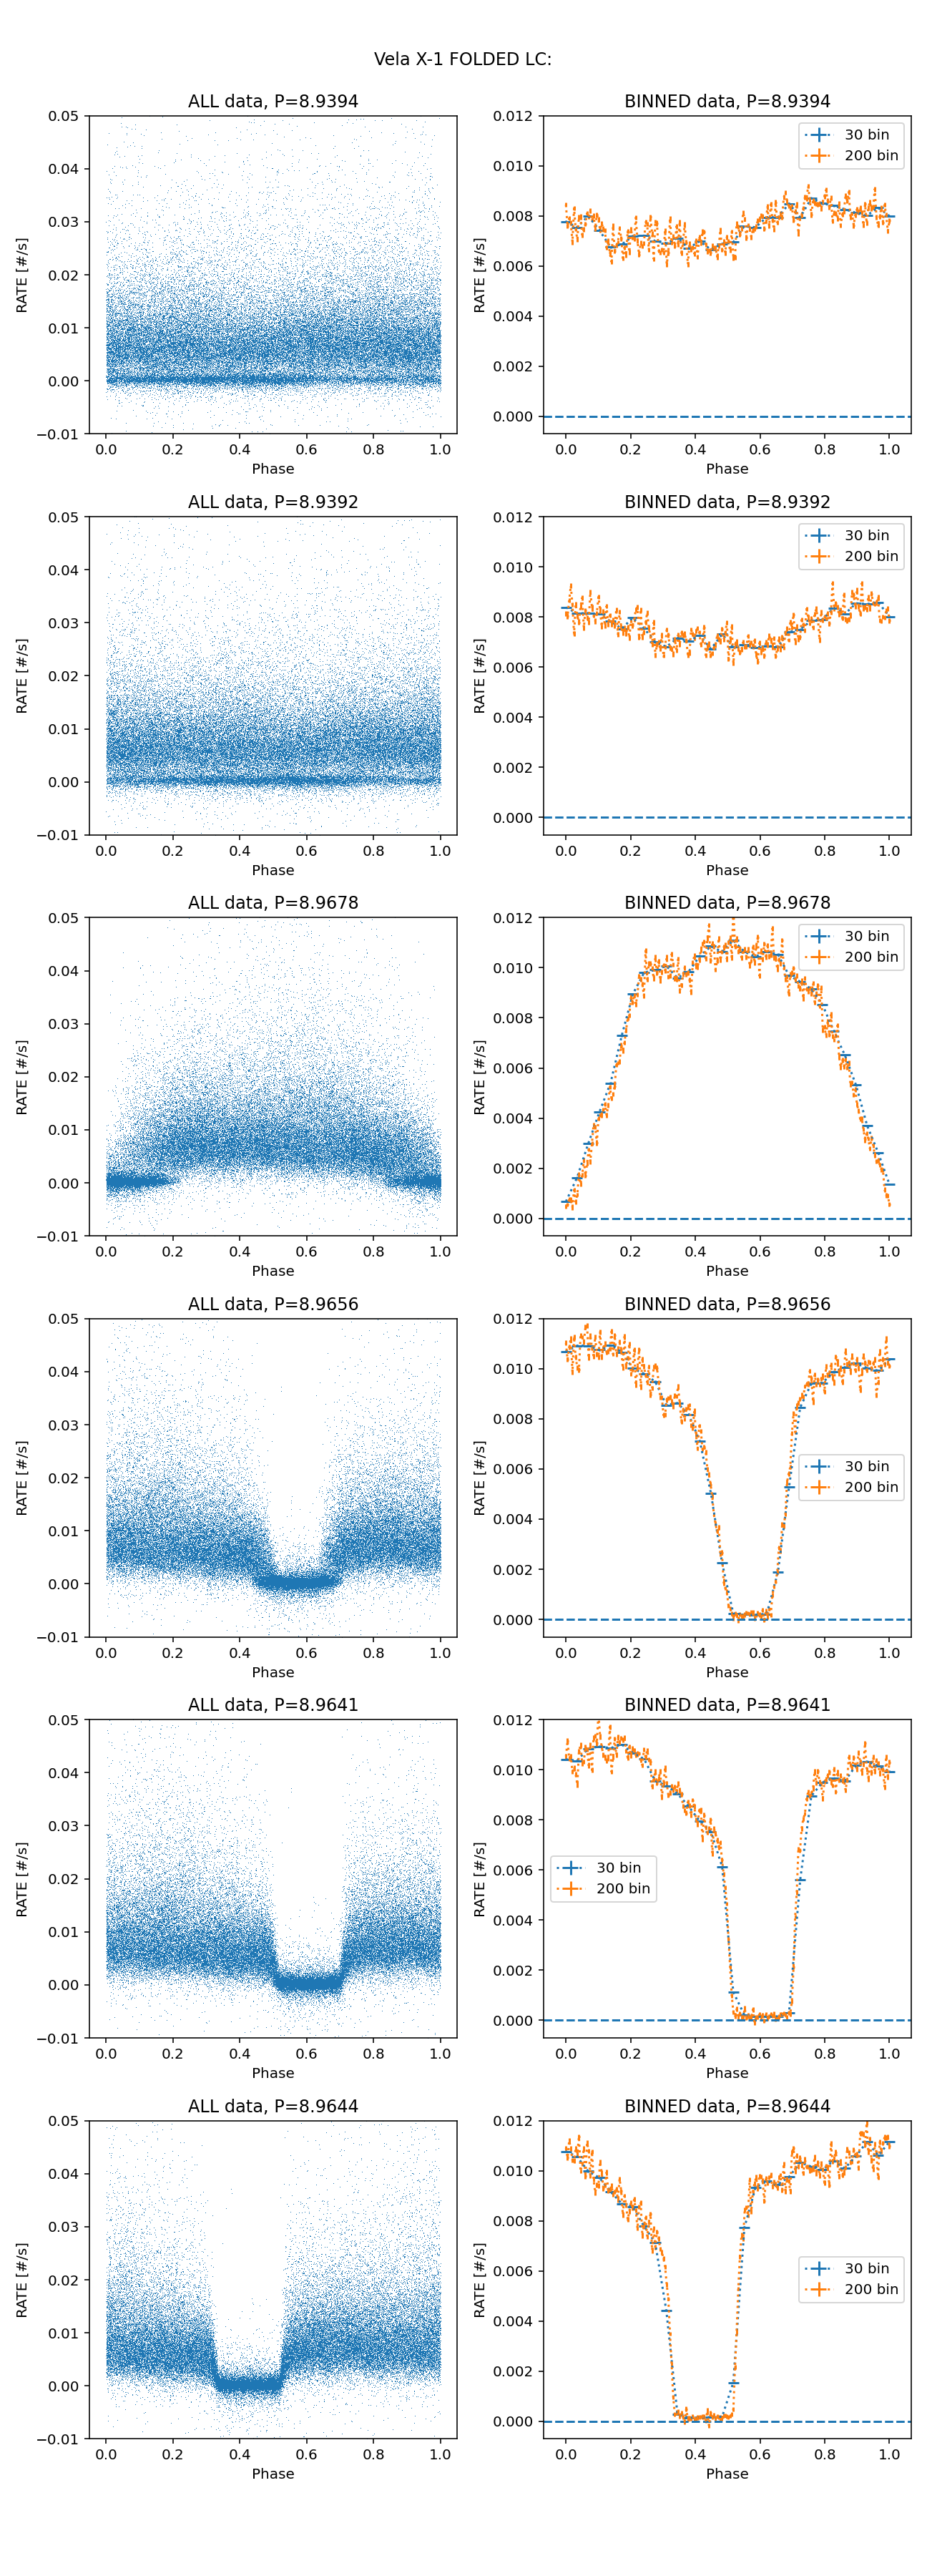

In [18]:
def binned_plot(bin,arr,ax):
    avg,avg_err,avg_err_mean=[],[],[]
    for i in range(bin):
        a = arr[np.logical_and(arr['PHASE']>i/bin,arr['PHASE']<(i+1)/bin)]
        avg.append(a.RATE.mean())
        avg_err.append(np.sqrt((a.ERROR*a.ERROR).sum())/len(a.ERROR))
        avg_err_mean.append(a.ERROR.mean())
    ax.errorbar(np.linspace(0,1,bin),avg,xerr=0.5/bin,yerr=avg_err,ls=':',label='%s bin' % bin)
    ax.axhline(0,ls='--')
    return

# Create FOLDED LC
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(9,25))
fig.suptitle('Vela X-1 FOLDED LC:')
for m,period in enumerate([8.93942351813576,
                           8.939215392153923,                           
                           8.967823678236783,
                           8.96558865588656,
                           8.96409864098641,
                           8.964357]):
    vela['PHASE'] = np.zeros(len(vela['TIME']))
    for n,t in enumerate(vela['TIME']):
        vela.at[n,'PHASE'] = (t % period)/period
    ax[m,0].set(title='ALL data, P=%.4f' % period, xlabel='Phase', ylabel='RATE [#/s]', ylim=(-0.01,0.05))
    ax[m,0].plot(vela['PHASE'],vela['RATE'],',')
    
    binned_plot(30,vela,ax[m,1])
    ax[m,1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='RATE [#/s]', ylim=(-0.0007,0.012))
    binned_plot(200,vela,ax[m,1])    
    ax[m,1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

<IPython.core.display.Javascript object>


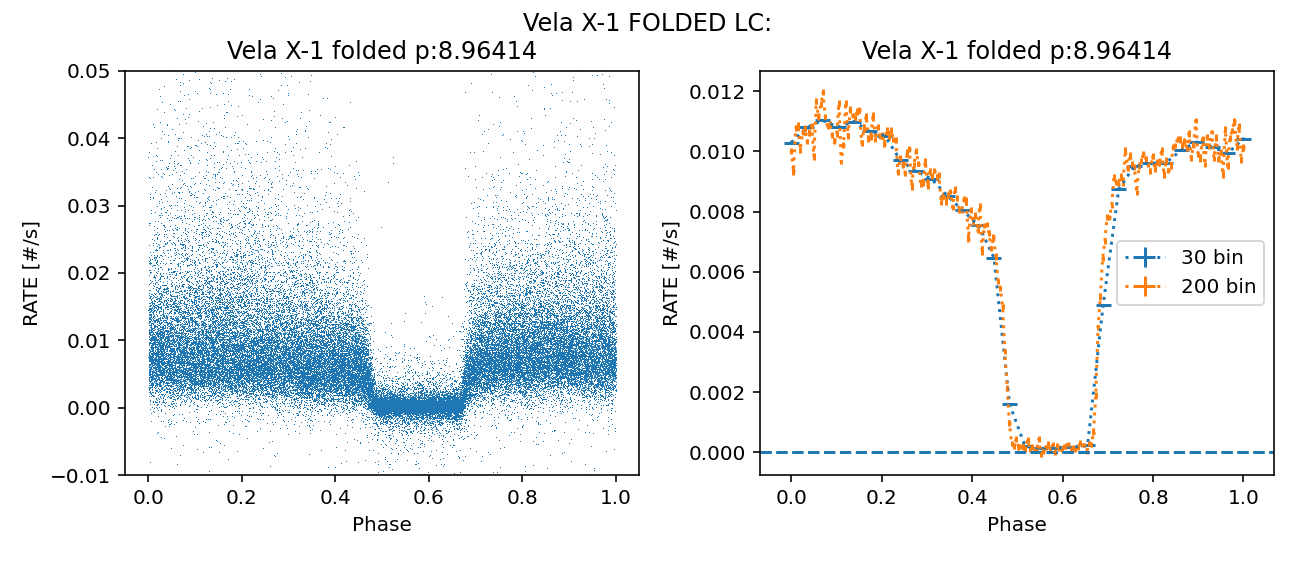

period bin_min best_period max_bin_min
p = 8.96000	b = 14	bp = 8.96000	bb = 14
p = 8.96010	b = 15	bp = 8.96010	bb = 15
p = 8.96020	b = 16	bp = 8.96020	bb = 16
p = 8.96030	b = 17	bp = 8.96030	bb = 17
p = 8.96040	b = 18	bp = 8.96040	bb = 18
p = 8.96051	b = 17	bp = 8.96040	bb = 18
p = 8.96061	b = 19	bp = 8.96061	bb = 19
p = 8.96071	b = 20	bp = 8.96071	bb = 20
p = 8.96081	b = 20	bp = 8.96071	bb = 20
p = 8.96091	b = 21	bp = 8.96091	bb = 21
p = 8.96101	b = 21	bp = 8.96091	bb = 21
p = 8.96111	b = 21	bp = 8.96091	bb = 21
p = 8.96121	b = 23	bp = 8.96121	bb = 23
p = 8.96131	b = 24	bp = 8.96131	bb = 24
p = 8.96141	b = 25	bp = 8.96141	bb = 25
p = 8.96152	b = 25	bp = 8.96141	bb = 25
p = 8.96162	b = 26	bp = 8.96162	bb = 26
p = 8.96172	b = 27	bp = 8.96172	bb = 27
p = 8.96182	b = 27	bp = 8.96172	bb = 27
p = 8.96192	b = 27	bp = 8.96172	bb = 27
p = 8.96202	b = 28	bp = 8.96202	bb = 28
p = 8.96212	b = 29	bp = 8.96212	bb = 29
p = 8.96222	b = 29	bp = 8.96212	bb = 29
p = 8.96232	b = 30	bp = 8.96232	bb = 30
p

In [22]:
'''
## TAKE SOME MINUTES TO EXECUTE
# Fine tune the periodicity, looking for the PERIOD which MAXIMIZE the ECLIPSE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.suptitle('Vela X-1 FOLDED LC:')
max_bin_min = 0
best_period = 0
print('period bin_min best_period max_bin_min')
for period in np.linspace(8.96,8.97,100):
    vela['PHASE'] = np.zeros(len(vela['TIME']))
    for n,t in enumerate(vela['TIME']):
        vela.at[n,'PHASE'] = (t % period)/period

    avg,avg_err,avg_err_mean=[],[],[]
    bin=200
    bin_min = 0
    for i in range(bin):
        a = vela[np.logical_and(vela['PHASE']>i/bin,vela['PHASE']<(i+1)/bin)]
        avg.append(a.RATE.mean())
        avg_err.append(np.sqrt((a.ERROR*a.ERROR).sum())/len(a.ERROR))
        avg_err_mean.append(a.ERROR.mean())
        if avg[-1] + avg_err[-1] < 0.002:
            bin_min += 1
    if bin_min > max_bin_min:
        max_bin_min = bin_min
        best_period = period
    print('p = %.5f\tb = %s\tbp = %.5f\tbb = %s' % (period,bin_min,best_period,max_bin_min))

# Redo the plot with the BEST PERIOD
vela['PHASE'] = np.zeros(len(vela['TIME']))
for n,t in enumerate(vela['TIME']):
    vela.at[n,'PHASE'] = (t % best_period)/best_period
ax[0].set(title='Vela X-1 folded p:%.5f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
ax[0].plot(vela['PHASE'],vela['RATE'],',')
ax[0].set_ylim(-0.01,0.05)

binned_plot(30,vela,ax[1])
ax[1].set(title='Vela X-1 folded p:%.5f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')

binned_plot(200,vela,ax[1])
ax[1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
'''

<IPython.core.display.Javascript object>


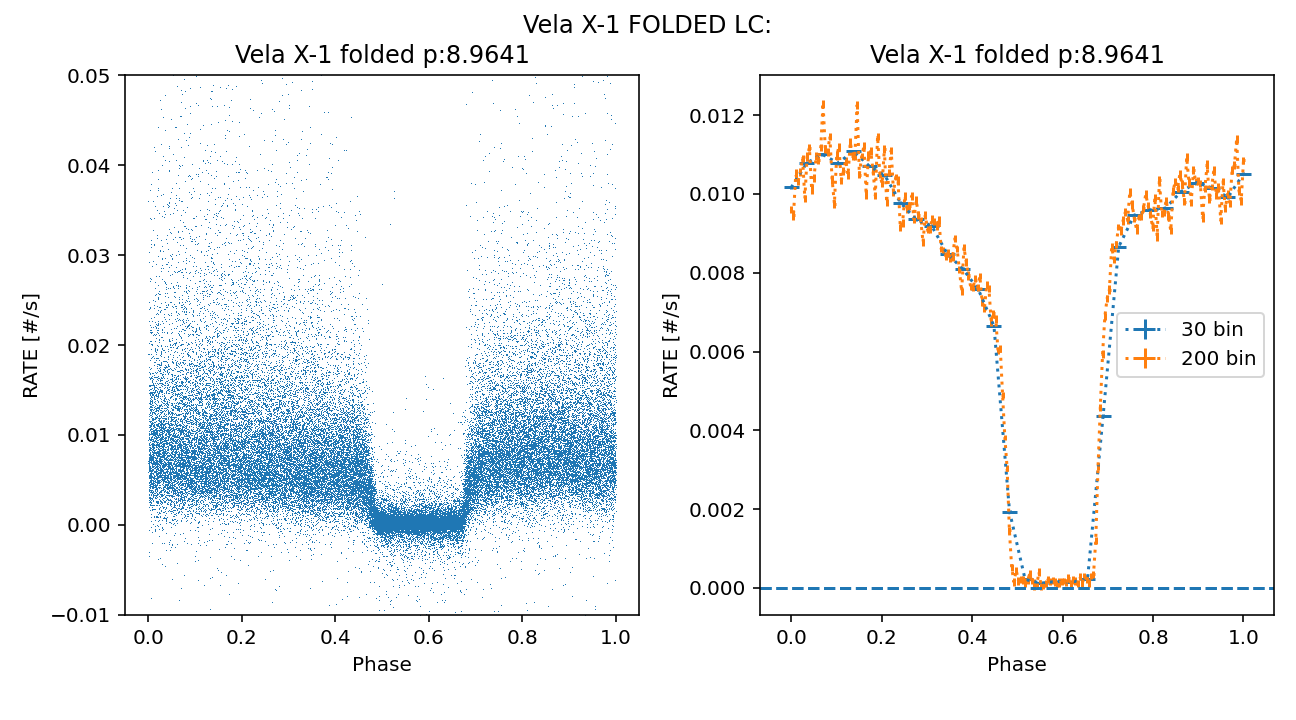

period bin_min best_period max_bin_min
p = 8.96300	b = 34	bp = 8.96300	bb = 34
p = 8.96310	b = 35	bp = 8.96310	bb = 35
p = 8.96321	b = 35	bp = 8.96310	bb = 35
p = 8.96331	b = 36	bp = 8.96331	bb = 36
p = 8.96341	b = 36	bp = 8.96331	bb = 36
p = 8.96352	b = 37	bp = 8.96352	bb = 37
p = 8.96362	b = 37	bp = 8.96352	bb = 37
p = 8.96372	b = 38	bp = 8.96372	bb = 38
p = 8.96383	b = 37	bp = 8.96372	bb = 38
p = 8.96393	b = 38	bp = 8.96372	bb = 38
p = 8.96403	b = 38	bp = 8.96372	bb = 38
p = 8.96414	b = 39	bp = 8.96414	bb = 39
p = 8.96424	b = 39	bp = 8.96414	bb = 39
p = 8.96434	b = 38	bp = 8.96414	bb = 39
p = 8.96445	b = 39	bp = 8.96414	bb = 39
p = 8.96455	b = 38	bp = 8.96414	bb = 39
p = 8.96466	b = 39	bp = 8.96414	bb = 39
p = 8.96476	b = 37	bp = 8.96414	bb = 39
p = 8.96486	b = 38	bp = 8.96414	bb = 39
p = 8.96497	b = 37	bp = 8.96414	bb = 39
p = 8.96507	b = 36	bp = 8.96414	bb = 39
p = 8.96517	b = 35	bp = 8.96414	bb = 39
p = 8.96528	b = 35	bp = 8.96414	bb = 39
p = 8.96538	b = 35	bp = 8.96414	bb = 39
p

<IPython.core.display.Javascript object>


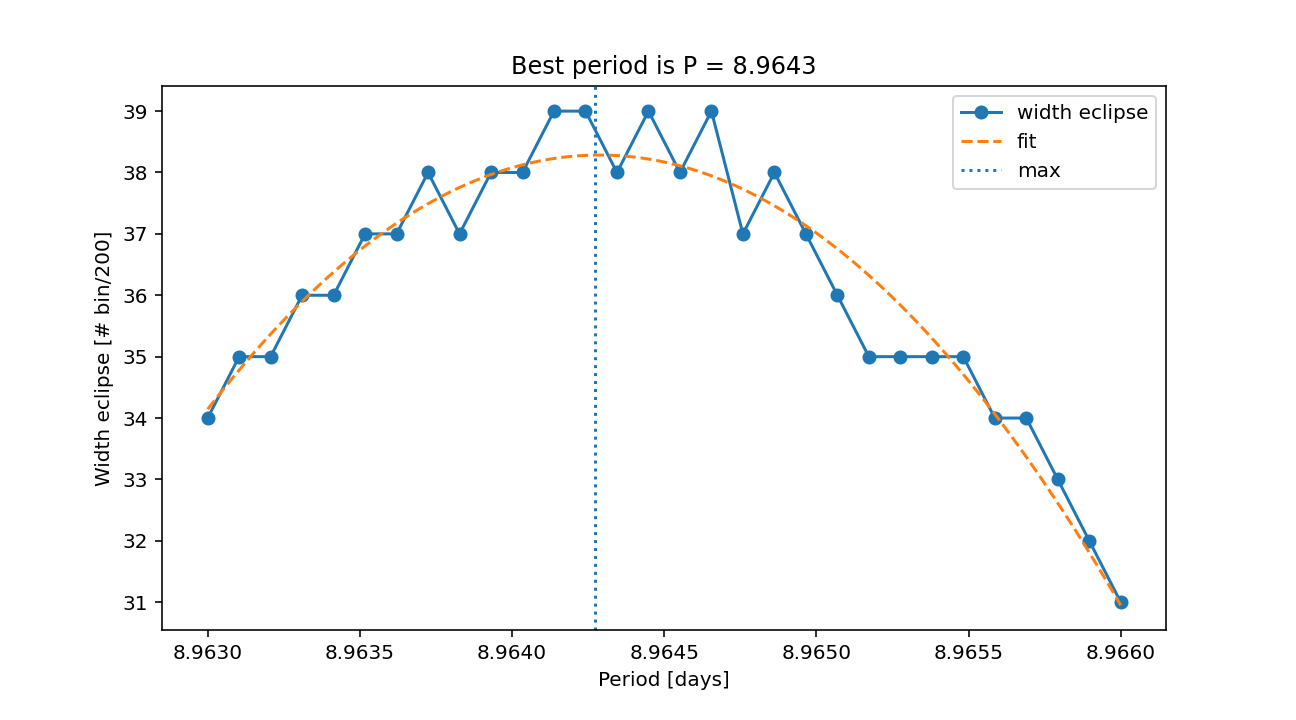

In [21]:
# Fine tune the periodicity and look for the PERIOD which MAXIMIZE the ECLIPSE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Vela X-1 FOLDED LC:')

max_bin_min = 0
best_period = 0
bin=200
period_list = []
width_eclipse = []
print('period bin_min best_period max_bin_min')
for period in np.linspace(8.963,8.966,30):
    vela['PHASE'] = np.zeros(len(vela['TIME']))
    for n,t in enumerate(vela['TIME']):
        vela.at[n,'PHASE'] = (t % period)/period    
    avg,avg_err,avg_err_mean=[],[],[]
    bin_min = 0
    for i in range(bin):
        a = vela[np.logical_and(vela['PHASE']>i/bin,vela['PHASE']<(i+1)/bin)]
        avg.append(a.RATE.mean())
        avg_err.append(np.sqrt((a.ERROR*a.ERROR).sum())/len(a.ERROR))
        avg_err_mean.append(a.ERROR.mean())
        if avg[-1] + avg_err[-1] < 0.002:
            bin_min += 1
    width_eclipse.append(bin_min)
    period_list.append(period)
    if bin_min > max_bin_min:
        max_bin_min = bin_min
        best_period = period
    print('p = %.5f\tb = %s\tbp = %.5f\tbb = %s' % (period,bin_min,best_period,max_bin_min))

# Redo the plot with the BEST PERIOD
vela['PHASE'] = np.zeros(len(vela['TIME']))
for n,t in enumerate(vela['TIME']):
    vela.at[n,'PHASE'] = (t % best_period)/best_period

ax[0].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
ax[0].plot(vela['PHASE'],vela['RATE'],',')
ax[0].set_ylim(-0.01,0.05)

binned_plot(30,vela,ax[1])
ax[1].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
binned_plot(200,vela,ax[1])
ax[1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set(title='Eclipse width as a function of period',xlabel='Period [days]',ylabel='Width eclipse [# bin/%s]'%bin)
ax.plot(period_list,width_eclipse,'o-',label='width eclipse')
z = np.polyfit(period_list, width_eclipse, 2)
p = np.poly1d(z)
xp = np.linspace(period_list[0], period_list[-1], 100)
ax.plot(xp, p(xp), '--', label='fit')
ax.axvline(xp[np.argmax(p(xp))],ls=':', label = 'max')
ax.set_title('Best period is P = %.4f' % xp[np.argmax(p(xp))])
ax.legend()

In [23]:
# Folded light curve (many software available... efold from FTOOLS...)
period = 8.964357 #day

vela['PHASE'] = np.zeros(len(vela['TIME']))
for n,t in enumerate(vela['TIME']):
    vela.at[n,'PHASE'] = (t % period)/period

In [24]:
vela

TIME   TIMEDEL      RATE     ERROR   FRACEXP     PHASE
0      53372.581892  0.018924  0.007041  0.000352  0.351864  0.866172
1      53372.630028  0.004132  0.014340  0.000551  0.519747  0.871541
2      53372.695937  0.004167  0.016943  0.000599  0.469227  0.878894
3      53372.764988  0.001991  0.011762  0.000820  0.508523  0.886596
4      53372.836238  0.002824  0.016876  0.000686  0.503865  0.894545
...             ...       ...       ...       ...       ...       ...
60154  58269.743709  0.005799  0.003087  0.001022  0.254512  0.158763
60155  58269.810497  0.003472  0.005071  0.000936  0.558685  0.166213
60156  58269.816573  0.001736  0.006453  0.001358  0.558717  0.166891
60157  58269.882349  0.011852  0.005826  0.000599  0.512996  0.174229
60158  58269.950156  0.008183  0.006149  0.000662  0.545433  0.181793

[60159 rows x 6 columns]

<IPython.core.display.Javascript object>


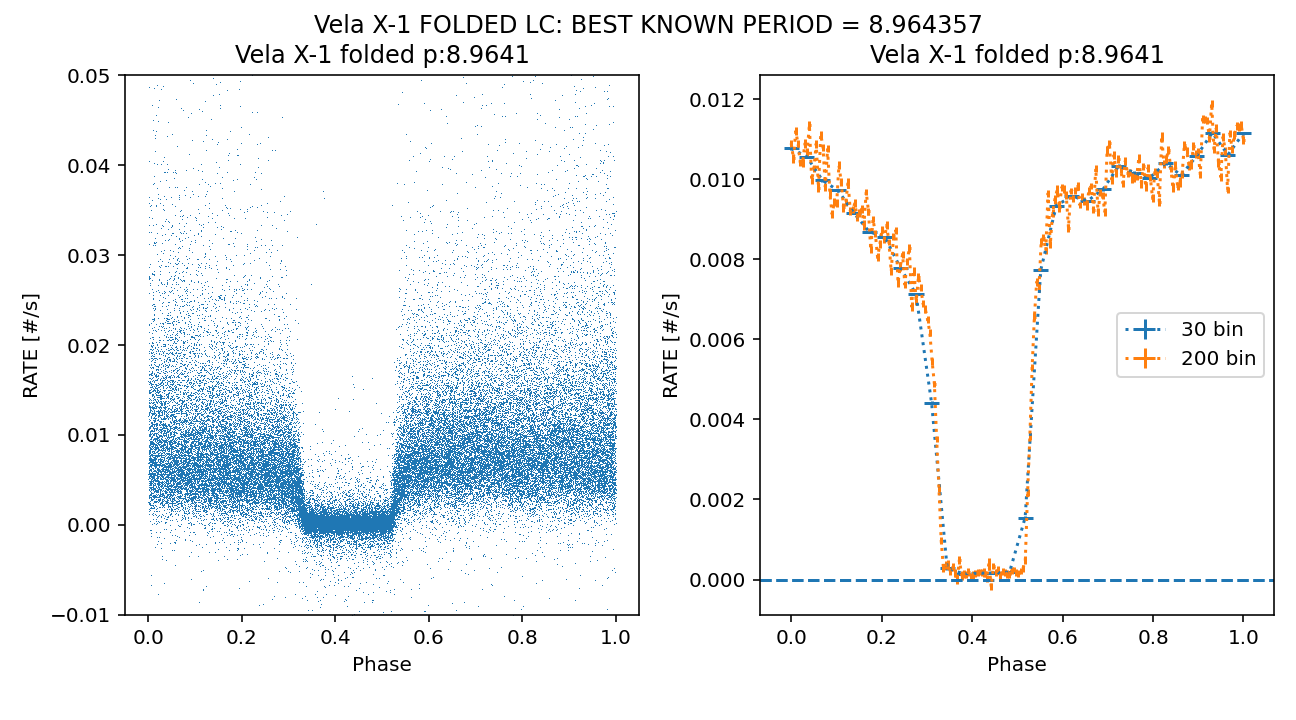

In [26]:
# Remake the plot with the best know period
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Vela X-1 FOLDED LC: BEST KNOWN PERIOD = %s' % period)

ax[0].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
ax[0].plot(vela['PHASE'],vela['RATE'],',')
ax[0].set_ylim(-0.01,0.05)

binned_plot(30,vela,ax[1])
ax[1].set(title='Vela X-1 folded p:%.4f' % best_period,xlabel='Phase',ylabel='RATE [#/s]')
binned_plot(200,vela,ax[1])
ax[1].legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

<IPython.core.display.Javascript object>


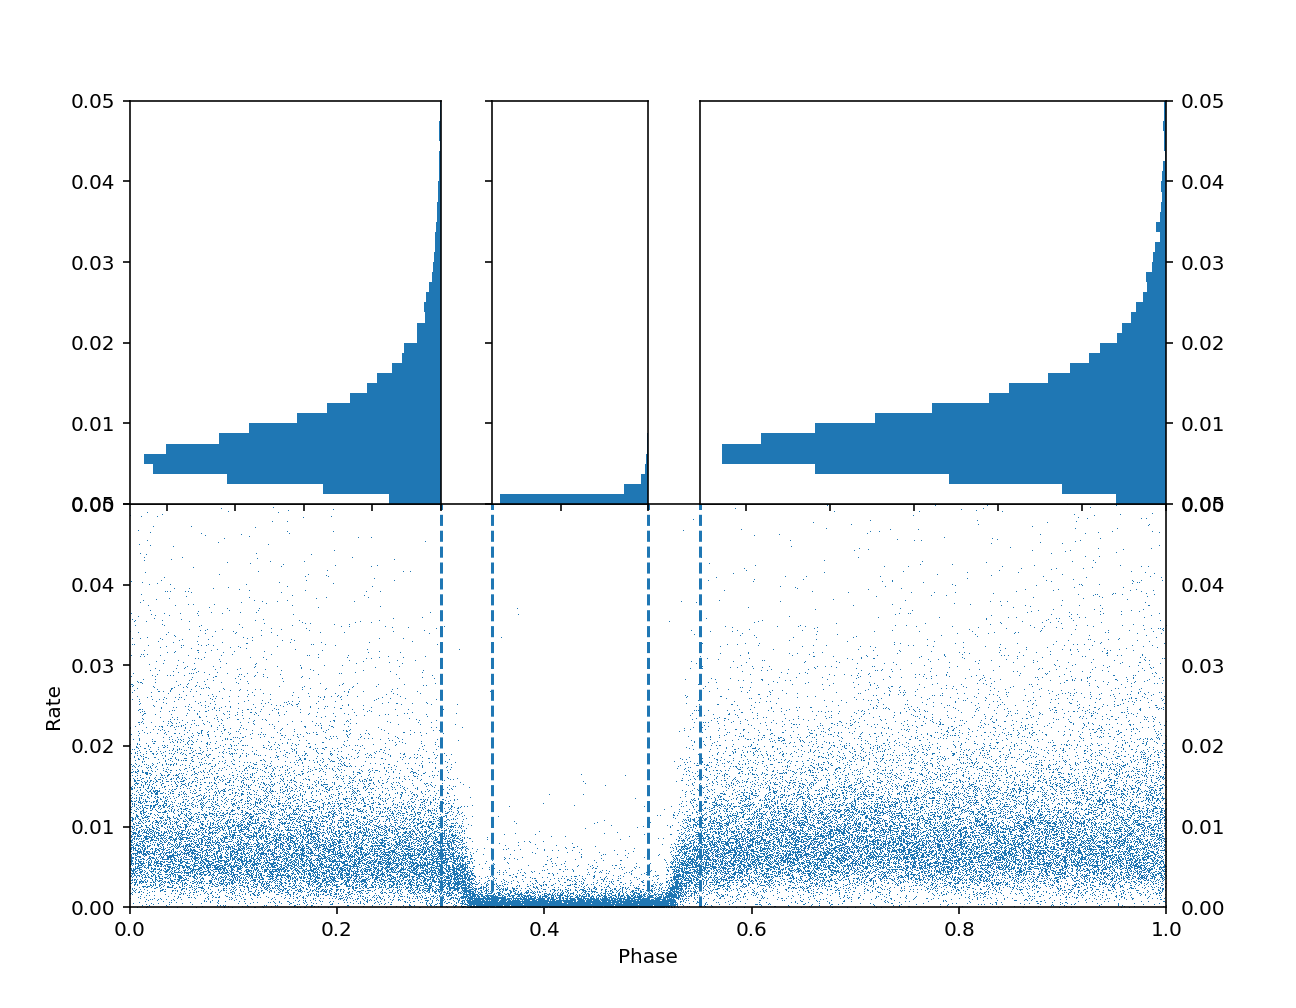

In [27]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(9,7))
grid = plt.GridSpec(2, 10, hspace=0, wspace=0.)
bottom = fig.add_axes([0.1, 0.1, 0.8, 0.4])
bottom.plot(vela['PHASE'],vela['RATE'],',')
bottom.set(xlim=(0,1),ylim=(0,0.05),xlabel='Phase',ylabel='Rate')
bottom.tick_params(labelright=True)
for i in [0.3,0.35,0.5,0.55]:
    bottom.axvline(i,ls='--')

nbins=40
left = fig.add_axes([0.1, 0.5, 0.24, 0.4], xticklabels=[], sharey=bottom)
left.hist(vela['RATE'][vela['PHASE']<0.3],range=[0,0.05],bins=nbins,orientation='horizontal')
left.invert_xaxis()

right = fig.add_axes([0.54, 0.5, 0.36, 0.4], xticklabels=[], sharey=bottom)
right.hist(vela['RATE'][vela['PHASE']>0.6],range=[0,0.05],bins=nbins,orientation='horizontal')
right.invert_xaxis()
right.yaxis.tick_right()

center = fig.add_axes([0.38, 0.5, 0.12, 0.4], sharey=bottom)
center.hist(vela['RATE'][np.logical_and(vela['PHASE']>0.35,vela['PHASE']<0.5)],range=[0,0.05],bins=nbins,orientation='horizontal')
center.invert_xaxis()
center.tick_params(labelbottom=False, labelleft=False)

# Move now to analyse Fermi-LAT data (gamma-rays)

Download Fermi-LAT data of Geminga pulsar, from the START of the mission till MJD = 55196 from the website:

https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi

![title](pics/data_query.png)

In [28]:
# Loading SPACECRAFT file
sc = 'data/spacecraft.fits'
fits.info(sc)

Filename: data/spacecraft.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SC_DATA       1 BinTableHDU    265   1237128R x 30C   [D, D, 3E, E, E, D, E, E, E, E, E, E, L, E, E, E, E, E, E, E, J, B, I, D, D, D, D, D, E, E]   


In [29]:
# See HEADER file for further info
hdu = fits.open(sc)
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  152 / width of table in bytes                        
NAXIS2  =              1237128 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   30 / number of fields in each row                   
TTYPE1  = 'START   '           / STARTing time of interval (Mission Elapsed Time
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'STOP    '           / ending time of interval (Mission Elapsed Time) 
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'SC_POSITION'     

We need to run now "gtselect":
![title](pics/gtselect.png)

...and then "gtmktime":
![title](pics/gtmktime.png)

In [30]:
# Load photon files
geminga_file = 'data/Geminga_gtis.fits'
fits.info(geminga_file)

Filename: data/Geminga_gtis.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    281   825831R x 24C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E, 1D]   
  2  GTI           1 BinTableHDU     46   7718R x 2C   [D, D]   


In [31]:
# LOAD data with PANDAS and look at the EVENT table
geminga_hdu = fits.open('data/Geminga_gtis.fits')
geminga_data = geminga_hdu[1].data
names = [name for name in geminga_data.columns.names if len(geminga_data[name].shape) <= 1]
geminga = Table.read('data/Geminga_gtis.fits',hdu=1)
geminga = geminga[names].to_pandas()
geminga

ENERGY         RA        DEC           L         B      THETA  \
0       698.505249  92.473900   4.267694  204.340515 -7.241839  39.276966   
1       181.965912  91.801582   7.480540  201.172226 -6.308341  27.800467   
2       777.253906  93.286362   5.322869  203.786514 -6.031031  21.666395   
3       247.248627  90.420555   5.396016  202.358856 -8.509195  29.055710   
4       184.727081  91.985626   7.678277  201.084976 -6.053667  45.977798   
...            ...        ...        ...         ...       ...        ...   
825826  539.685913  87.700645  21.189392  187.245377 -2.990654  26.225046   
825827  143.162430  86.455383  22.932472  185.154037 -3.084014  24.365854   
825828  409.190826  85.826942  22.656157  185.088318 -3.722531  26.628973   
825829  324.038757  86.524574  22.467596  185.585358 -3.270346  29.558941   
825830  656.170898  83.752808  21.790871  184.807556 -5.809851  30.691885   

               PHI  ZENITH_ANGLE  EARTH_AZIMUTH_ANGLE          TIME  ...  \
0         0.286979     39.846180           116.099724  2.395626e+08  ...   
1        18.536167     20.399565           137.183289  2.395629e+08  ...   
2        38.170670     13.384384           194.034363  2.395631e+08  ...   
3        67.697662     26.278366           259.774933  2.395635e+08  ...   
4        59.779999     44.822437           279.093353  2.395638e+08  ...   
...            ...           ...                  ...           ...  ...   
825826  156.057053     24.658457           323.043640  2.839096e+08  ...   
825827  154.541351     26.976273           321.381226  2.839096e+08  ...   
825828  152.116241     30.202486           306.521545  2.839098e+08  ...   
825829  154.406906     33.322189           298.121857  2.839099e+08  ...   
825830  149.550278     36.000381           294.977264  2.839099e+08  ...   

           RUN_ID  RECON_VERSION  CONVERSION_TYPE    LIVETIME  DIFRSP0  \
0       239559565              0                0    9.783103      0.0   
1       239559565              0                0  188.235601      0.0   
2       239559565              0                0  221.902632      0.0   
3       239559565              0                0  118.728690      0.0   
4       239559565              0                0   94.965935      0.0   
...           ...            ...              ...         ...      ...   
825826  283909409              0                1  214.911607      0.0   
825827  283909409              0                1  233.525214      0.0   
825828  283909409              0                1   69.353665      0.0   
825829  283909409              0                1  179.748906      0.0   
825830  283909409              0                0  190.552351      0.0   

        DIFRSP1  DIFRSP2  DIFRSP3  DIFRSP4  PULSE_PHASE  
0           0.0      0.0      0.0      0.0     0.974531  
1           0.0      0.0      0.0      0.0     0.871333  
2           0.0      0.0      0.0      0.0     0.135390  
3           0.0      0.0      0.0      0.0     0.974575  
4           0.0      0.0      0.0      0.0     0.291218  
...         ...      ...      ...      ...          ...  
825826      0.0      0.0      0.0      0.0     0.186743  
825827      0.0      0.0      0.0      0.0     0.690656  
825828      0.0      0.0      0.0      0.0     0.003041  
825829      0.0      0.0      0.0      0.0     0.598641  
825830      0.0      0.0      0.0      0.0     0.162455  

[825831 rows x 21 columns]

<IPython.core.display.Javascript object>


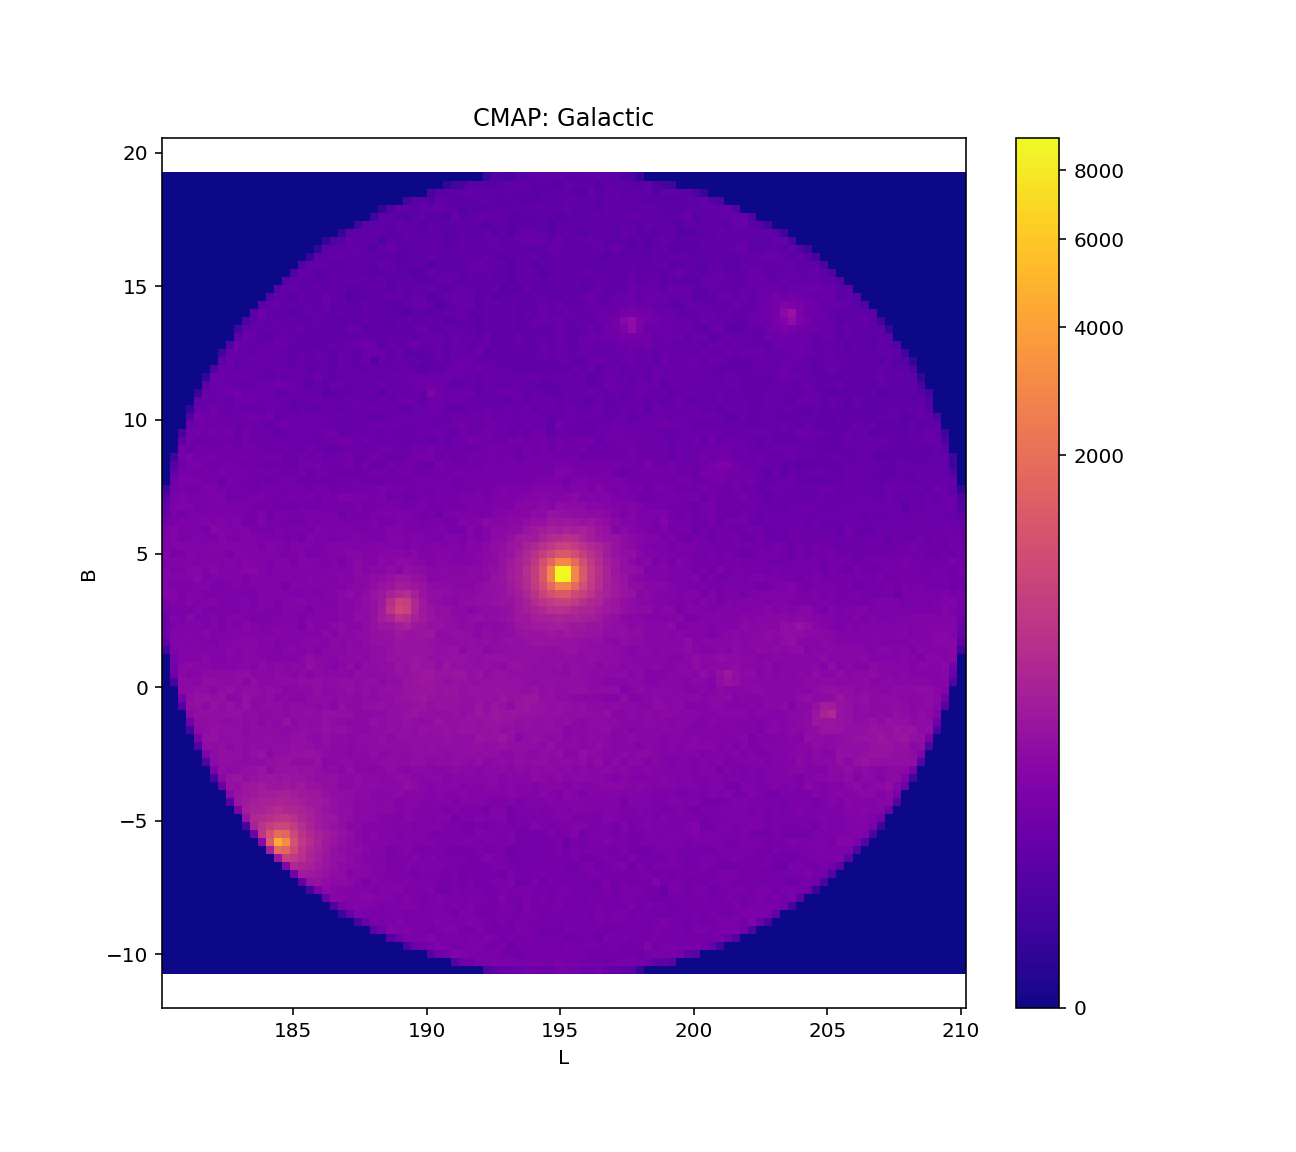

In [32]:
# We can now plot a count map of the events
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='CMAP: Galactic',xlabel='L',ylabel='B')
h = ax.hist2d(geminga['L'],geminga['B'],100, cmap='plasma', norm=colors.PowerNorm(0.3) )# norm=colors.LogNorm())
ax.axis('equal')
fig.colorbar(h[3], ax=ax, orientation='vertical')

In [33]:
# Crop 1deg around Geminga (to shrink the file size and account for bad PSF)
ra  = 98.476204
dec = 17.770661
dist = np.sqrt( (geminga['RA']-ra)**2 + (geminga['DEC']-dec)**2) 
crop = geminga[dist<1]

In [34]:
crop

ENERGY         RA        DEC           L         B      THETA  \
31817   1549.023071  98.863350  17.406977  195.627472  4.429537  50.741432   
31818    422.935028  98.076294  17.548695  195.157410  3.826344  47.923187   
31819   2065.372070  98.229301  17.838327  194.966156  4.088512  47.579494   
31820   1027.132812  98.616600  17.511015  195.427063  4.267377  45.022133   
31824    912.030457  98.663872  17.675556  195.300781  4.382473  44.138332   
...             ...        ...        ...         ...       ...        ...   
817654   203.254211  98.563789  17.900019  195.056839  4.399919  33.533001   
817655  1691.432495  98.375961  17.828590  195.038803  4.208247  33.512173   
817657   591.661072  98.366173  17.975723  194.903275  4.267134  33.895588   
817658  1285.548340  98.298050  16.856834  195.870987  3.697771  35.957043   
817659  1551.510498  98.343430  17.741659  195.102158  4.140984  36.159924   

               PHI  ZENITH_ANGLE  EARTH_AZIMUTH_ANGLE          TIME  ...  \
31817    13.299020     39.663044            93.077927  2.395626e+08  ...   
31818    15.244350     35.484810            94.903145  2.395626e+08  ...   
31819    15.877502     34.551243            94.806335  2.395626e+08  ...   
31820    17.201035     30.606989            97.205437  2.395627e+08  ...   
31824    18.226542     28.834759            97.666725  2.395627e+08  ...   
...            ...           ...                  ...           ...  ...   
817654  172.106201     16.563437           338.150970  2.839097e+08  ...   
817655  171.761063     16.568115           337.437836  2.839097e+08  ...   
817657  173.214264     18.203714           311.796539  2.839098e+08  ...   
817658  173.702148     20.400911           296.612122  2.839099e+08  ...   
817659  174.903229     23.271542           292.116089  2.839099e+08  ...   

           RUN_ID  RECON_VERSION  CONVERSION_TYPE    LIVETIME  DIFRSP0  \
31817   239559565              0                0    5.770964      0.0   
31818   239559565              0                1   60.089853      0.0   
31819   239559565              0                0   75.618635      0.0   
31820   239559565              0                0   21.389896      0.0   
31824   239559565              0                0   49.349853      0.0   
...           ...            ...              ...         ...      ...   
817654  283909409              0                0  244.234806      0.0   
817655  283909409              0                0  244.418510      0.0   
817657  283909409              0                0   82.152468      0.0   
817658  283909409              0                1  165.163426      0.0   
817659  283909409              0                0  228.007877      0.0   

        DIFRSP1  DIFRSP2  DIFRSP3  DIFRSP4  PULSE_PHASE  
31817       0.0      0.0      0.0      0.0     0.051843  
31818       0.0      0.0      0.0      0.0     0.161839  
31819       0.0      0.0      0.0      0.0     0.660166  
31820       0.0      0.0      0.0      0.0     0.141166  
31824       0.0      0.0      0.0      0.0     0.072278  
...         ...      ...      ...      ...          ...  
817654      0.0      0.0      0.0      0.0     0.858929  
817655      0.0      0.0      0.0      0.0     0.633711  
817657      0.0      0.0      0.0      0.0     0.982487  
817658      0.0      0.0      0.0      0.0     0.083972  
817659      0.0      0.0      0.0      0.0     0.132034  

[85318 rows x 21 columns]

<IPython.core.display.Javascript object>


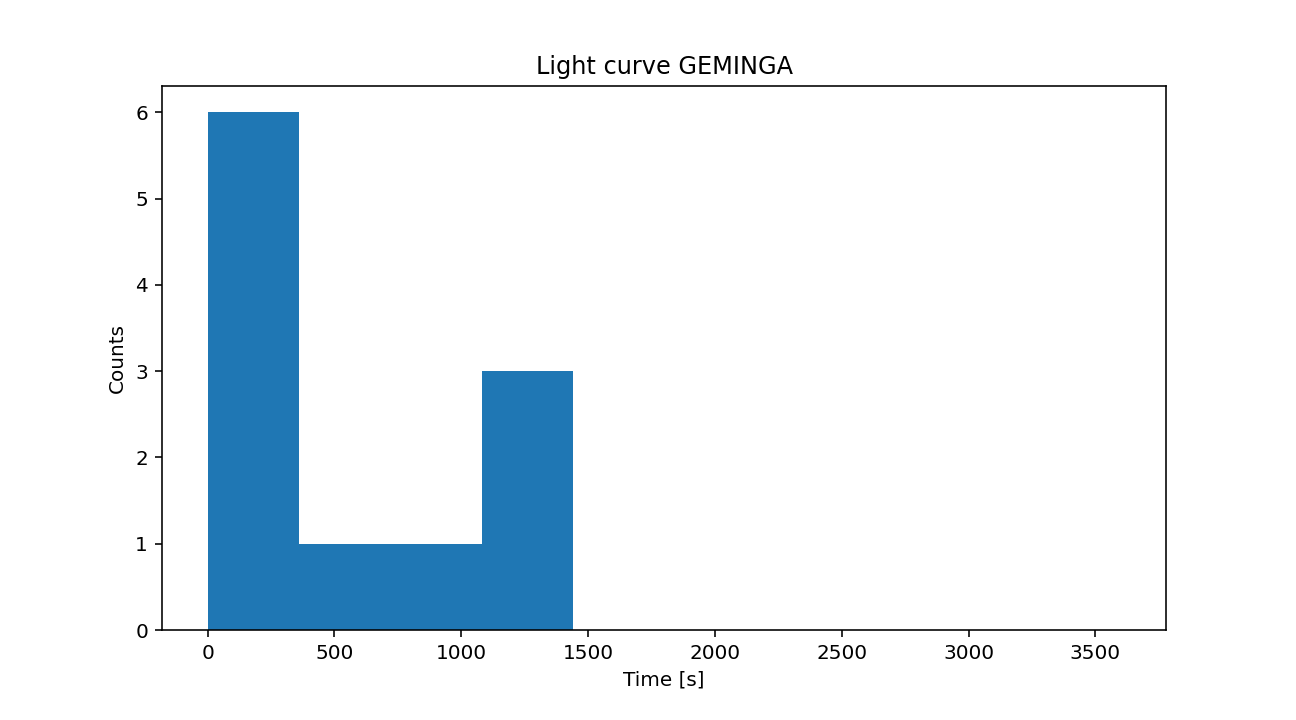

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))
ax.set(title='Light curve GEMINGA',xlabel='Time [s]',ylabel='Counts')
h = ax.hist(crop['TIME']-crop['TIME'].min(), 500)
#h = ax.hist(crop['TIME']-crop['TIME'].min(),range=(0,3600), bins=10)

In [42]:
#Precession of the satellite orbit:
4.5e6/86400 # days

52.083333333333336

Because the LAT data are sparse, long accumulation time is required. Calculating a pulse phase therefore requires precise position and timing information for the pulsar.

<IPython.core.display.Javascript object>


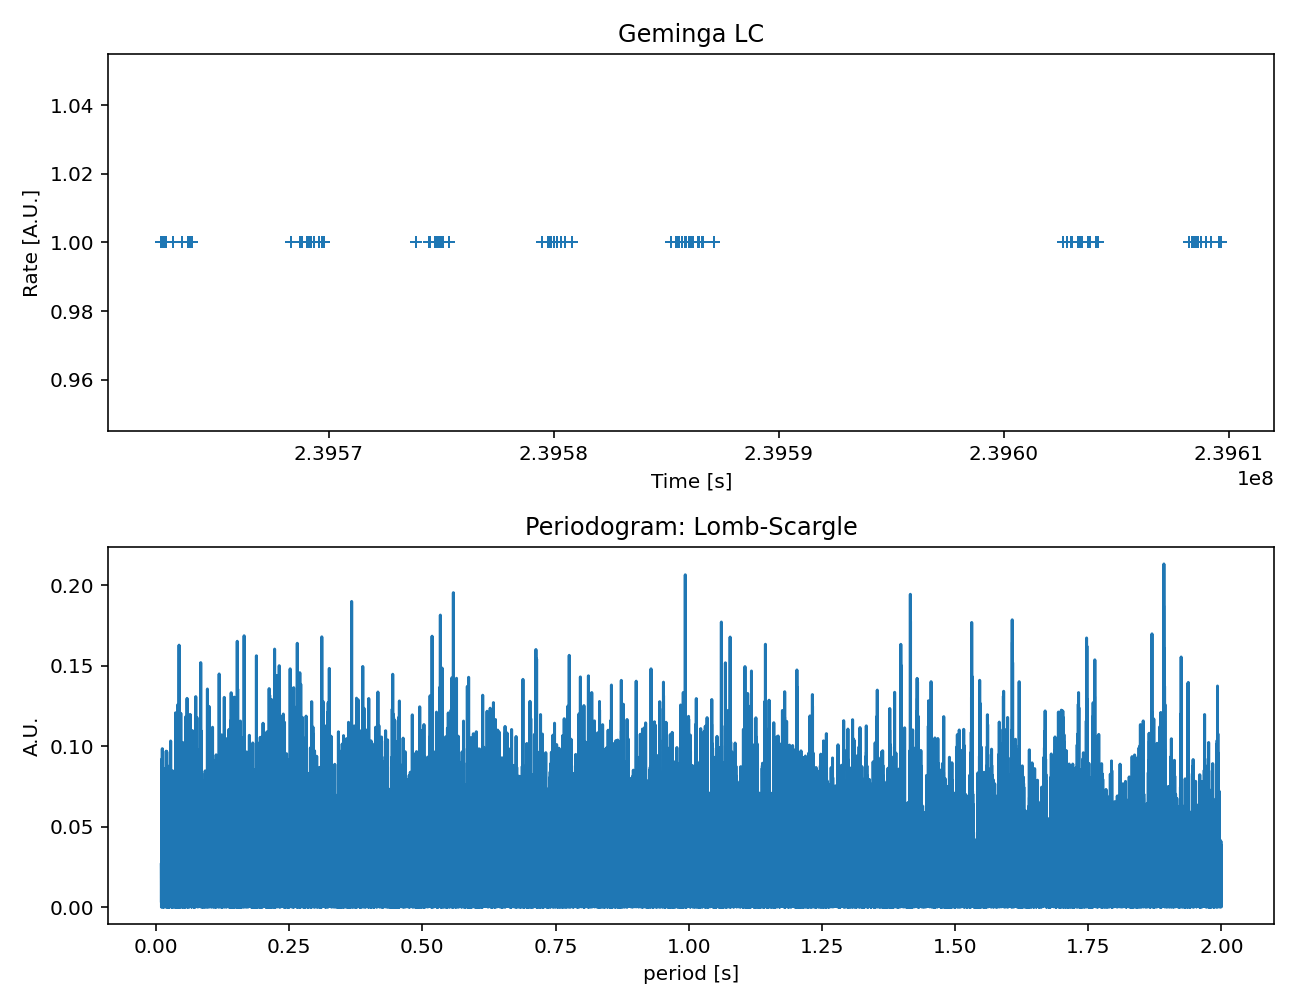

Best period = 1.8920414204142042


In [44]:
# The execution is VERY SLOW if we use ALL available data. So we reduce the time range
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

# Select TIME range and FILTER OUT negative values
x = crop['TIME'][:100]
y = np.ones(len(x))

# Define the array of frequencies for which to compute the periodogram:
nout=100000
p = np.linspace(0.01, 2, nout)
ang_freqs = 2 * np.pi / p

# Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(x, y, ang_freqs, normalize=True)

# Plot of the results:
ax[0].plot(x, y, '+')
ax[0].set(xlabel='Time [s]',ylabel='Rate [A.U.]',title='Geminga LC')
ax[1].plot(p, pgram)
ax[1].set(xlabel='period [s]',ylabel='A.U.',title='Periodogram: Lomb-Scargle')

for i,j in zip(p,pgram):
    if j==pgram.max():
        print('Best period = %s' % i)
fig.tight_layout()

In [45]:
# Lomb-Scargle does not work in this case. Let's try manually folde the LC
# Attribute PHASE to cropped Geminga
period = 1/4.217567
crop_dummy = crop.copy()
crop_dummy['PHASE'] = np.zeros(len(crop_dummy['TIME']))
for n,t in zip(crop_dummy.index,crop_dummy['TIME']):
    crop_dummy.loc[n,'PHASE'] = (t % period)/period

<IPython.core.display.Javascript object>


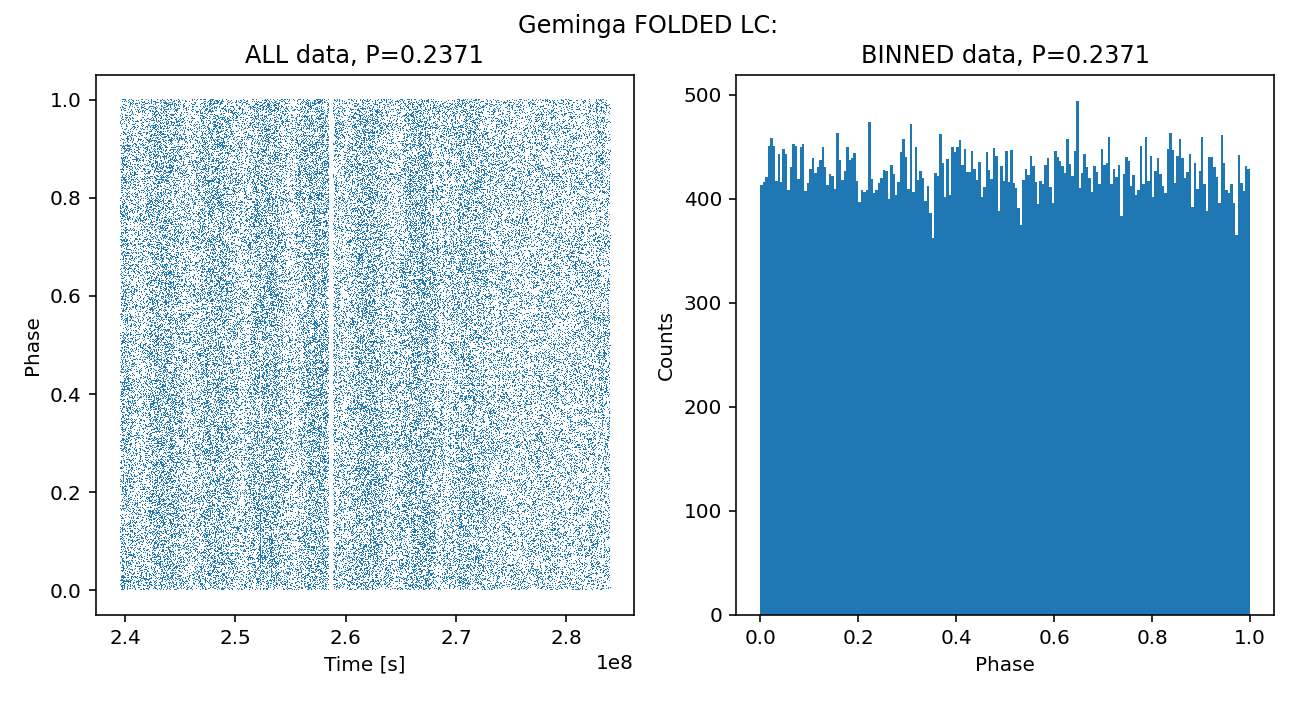

In [46]:
# Plot FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga FOLDED LC:')
ax[0].set(title='ALL data, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
ax[0].plot(crop_dummy['TIME'],crop_dummy['PHASE'],',')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(crop_dummy['PHASE'],200)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# Pulse profile is FLAT... Why it does not work?

In [ ]:
# See HEADER file for further info
geminga_hdu[1].header

## Performing BARYCENTRIC correction with gtbary (or faxbary)

The telescope is moving around the Earth, which in turns move around the Sun. So we should refer to the arrival time at a point in the solar system which is at rest. Such a point is the system's centre of mass, the so-called solar system barycentre, which we assume to be comoving with the pulsar.  

If the assumed pulsar position is inaccurate, our transformation to the solar system barycentre will be wrong too, creating a deviation from the expected arrival time that depends on the position of the Earth in its orbit. Hence, the deviation will have a sinusoid shape with the period of one year.

![title](pics/bary.png)

![title](pics/bary_formula.png)

![title](pics/bary_formula_component.png)

In [47]:
# Load Geminga_bary files
roi_file = 'data/gtbary/Geminga_1deg_roi.fits'
roi = fits.open(roi_file)
roi_fits = fits.open(roi_file)[1].data
names = [name for name in roi_fits.columns.names if len(roi_fits[name].shape) <= 1]
roi = Table.read(roi_file,hdu=1)
roi = roi[names].to_pandas()

roi_geo_file = 'data/gtbary/Geminga_1deg_roi_geo.fits'
roi_geo = fits.open(roi_geo_file)
roi_geo_fits = fits.open(roi_geo_file)[1].data
names = [name for name in roi_geo_fits.columns.names if len(roi_geo_fits[name].shape) <= 1]
roi_geo = Table.read(roi_geo_file,hdu=1)
roi_geo = roi_geo[names].to_pandas()

roi_bary_file = 'data/gtbary/Geminga_1deg_roi_bary.fits'
roi_bary = fits.open(roi_bary_file)
roi_bary_fits = fits.open(roi_bary_file)[1].data
names = [name for name in roi_bary_fits.columns.names if len(roi_bary_fits[name].shape) <= 1]
roi_bary = Table.read(roi_bary_file,hdu=1)
roi_bary = roi_bary[names].to_pandas()

<IPython.core.display.Javascript object>


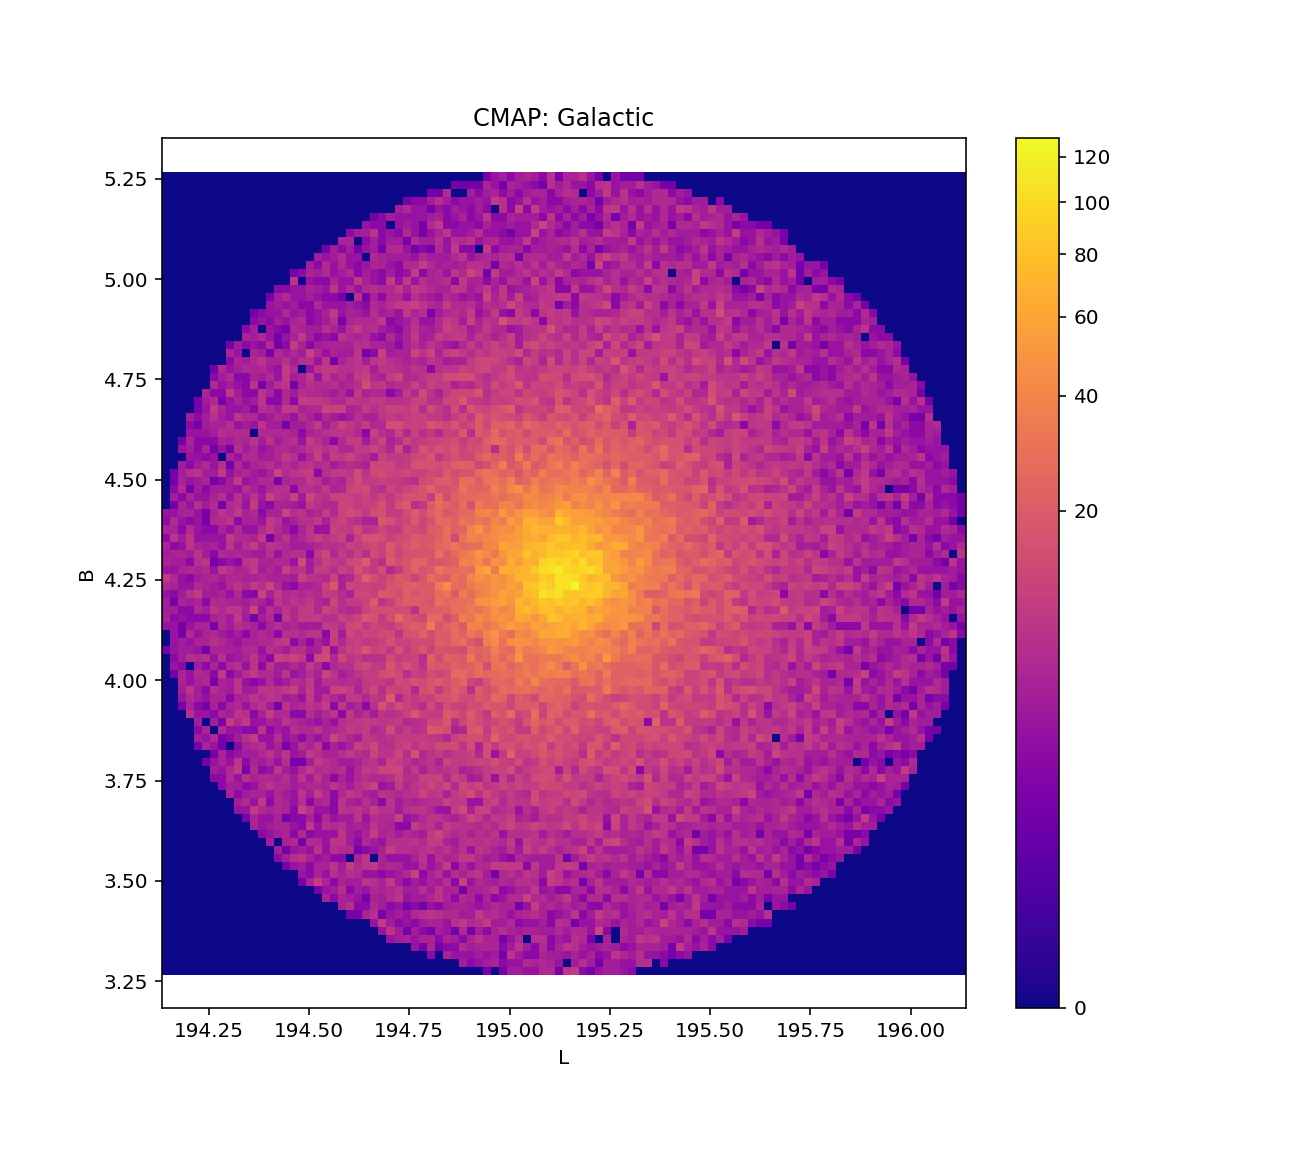

In [49]:
# Count map of the cropped events (1deg)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='CMAP: Galactic',xlabel='L',ylabel='B')
h = ax.hist2d(roi_bary['L'],roi_bary['B'],100, cmap='plasma', norm=colors.PowerNorm(0.3) )# norm=colors.LogNorm())
ax.axis('equal')
fig.colorbar(h[3], ax=ax, orientation='vertical')

In [50]:
fits.open(roi_file)[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   98 / width of table in bytes                        
NAXIS2  =                86805 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   23 / number of fields in each row                   
TTYPE1  = 'ENERGY  '           / energy of event                                
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TTYPE2  = 'RA      '           / right ascension (J2000) of event               
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'DEC     '        

In [51]:
fits.open(roi_geo_file)[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   98 / width of table in bytes                        
NAXIS2  =                86805 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   23 / number of fields in each row                   
TTYPE1  = 'ENERGY  '           / energy of event                                
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TTYPE2  = 'RA      '           / right ascension (J2000) of event               
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'DEC     '        

In [52]:
fits.open(roi_bary_file)[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   98 / width of table in bytes                        
NAXIS2  =                86805 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   23 / number of fields in each row                   
TTYPE1  = 'ENERGY  '           / energy of event                                
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TTYPE2  = 'RA      '           / right ascension (J2000) of event               
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'DEC     '        

<IPython.core.display.Javascript object>


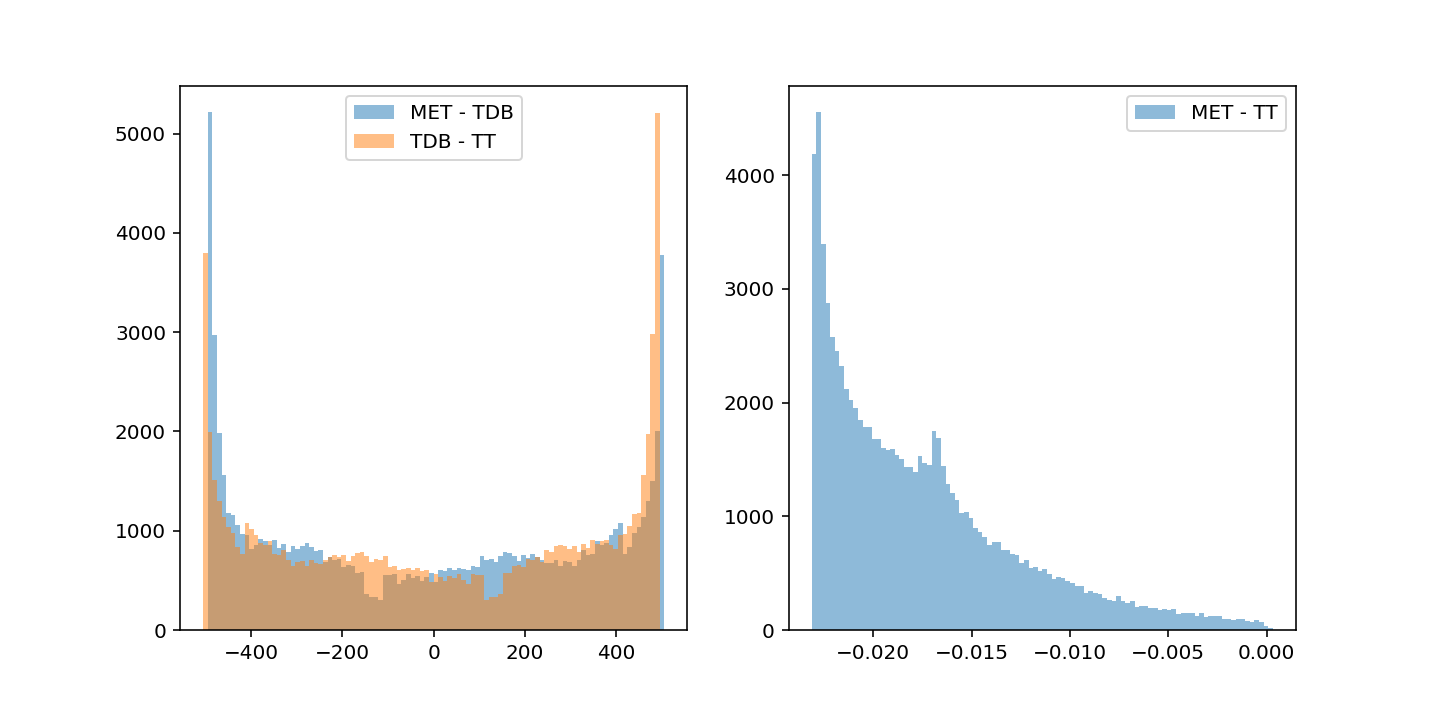

<IPython.core.display.Javascript object>


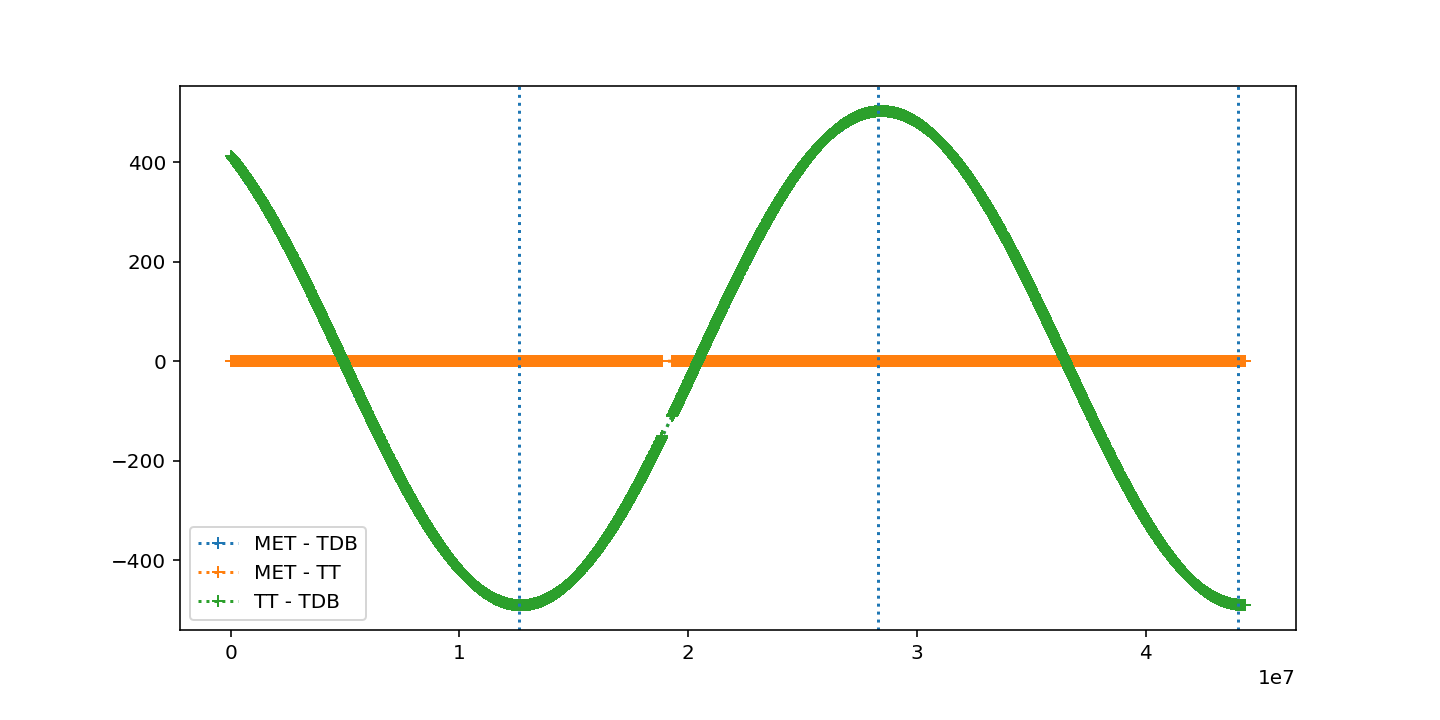

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
h1 = ax[0].hist(roi['TIME']-roi_bary['TIME'],     range=(-505,505), bins=100, alpha=0.5, label='MET - TDB')
h2 = ax[0].hist(roi_bary['TIME']-roi_geo['TIME'], range=(-505,505), bins=100, alpha=0.5, label='TDB - TT')
h3 = ax[1].hist(roi['TIME']-roi_geo['TIME'],      bins=100, alpha=0.5, label='MET - TT')
ax[0].legend()
ax[1].legend()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_bary['TIME'],    ':+', label='MET - TDB')
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_geo['TIME'],     ':+', label='MET - TT')
ax.plot(roi['TIME']-roi['TIME'].min(),roi_geo['TIME']-roi_bary['TIME'],':+',label='TT - TDB')
#ax.set(xlim=(9.694e6,9.702e6), ylim=(-0.025,-0.005))
ax.axvline(1.26e7,ls=':')
#ax.axvline(1.26e7+0.5*np.pi*1e7,ls=':')
ax.axvline(1.26e7+np.pi*1e7,ls=':')
ax.legend()

# Look for Ephemeris which describes the source

![title](pics/ephemeris.png)

![title](pics/Taylor.png)

In [63]:
# Attribute a PHASE to Geminga barycentered photons: 1st order
period = 1/4.217567
f0 = 4.217567
f1 = -1.952503e-13
roi_bary_dummy = roi_bary.copy()
roi_bary_dummy['PHASE'] = np.zeros(len(roi_bary_dummy['TIME']))
for n,t in zip(roi_bary_dummy.index,roi_bary_dummy['TIME']):
    roi_bary_dummy.loc[n,'PHASE'] = (t % period)/period

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


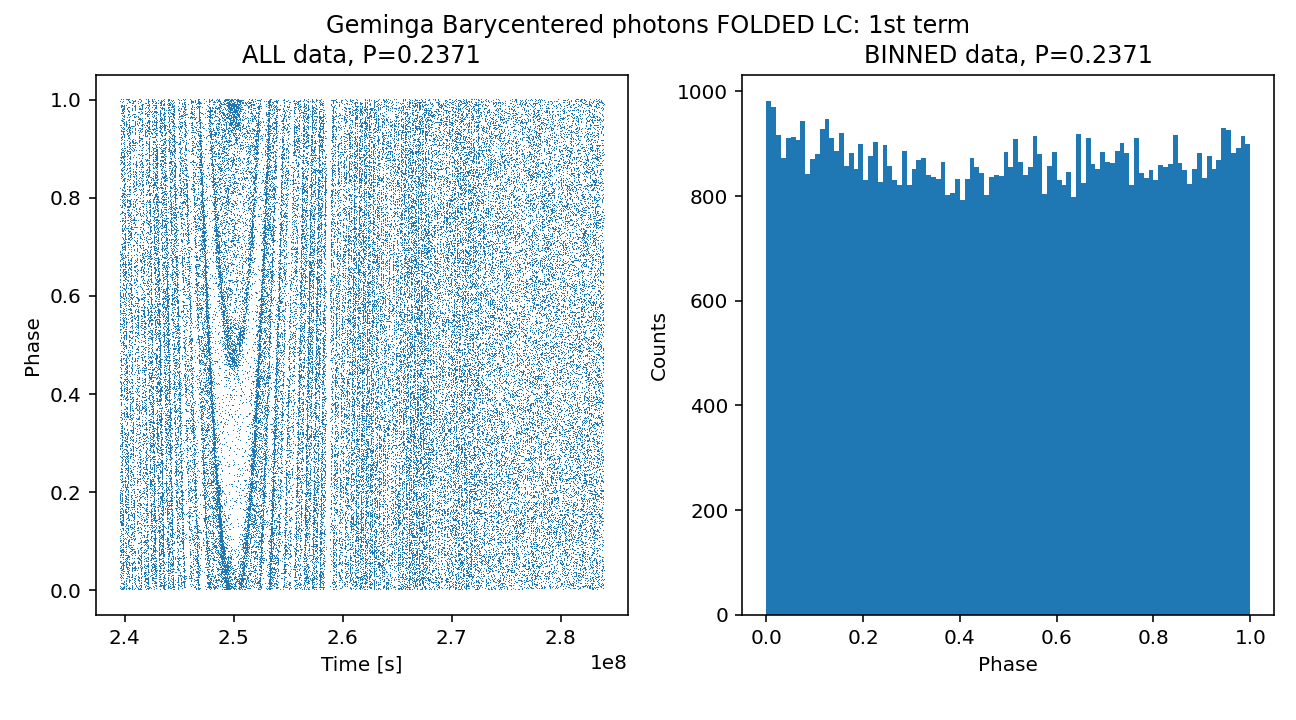

In [67]:
# Plot manually FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered photons FOLDED LC: 1st term')
ax[0].set(title='ALL data, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
ax[0].plot(roi_bary_dummy['TIME'],roi_bary_dummy['PHASE'],',')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy['PHASE'],100)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


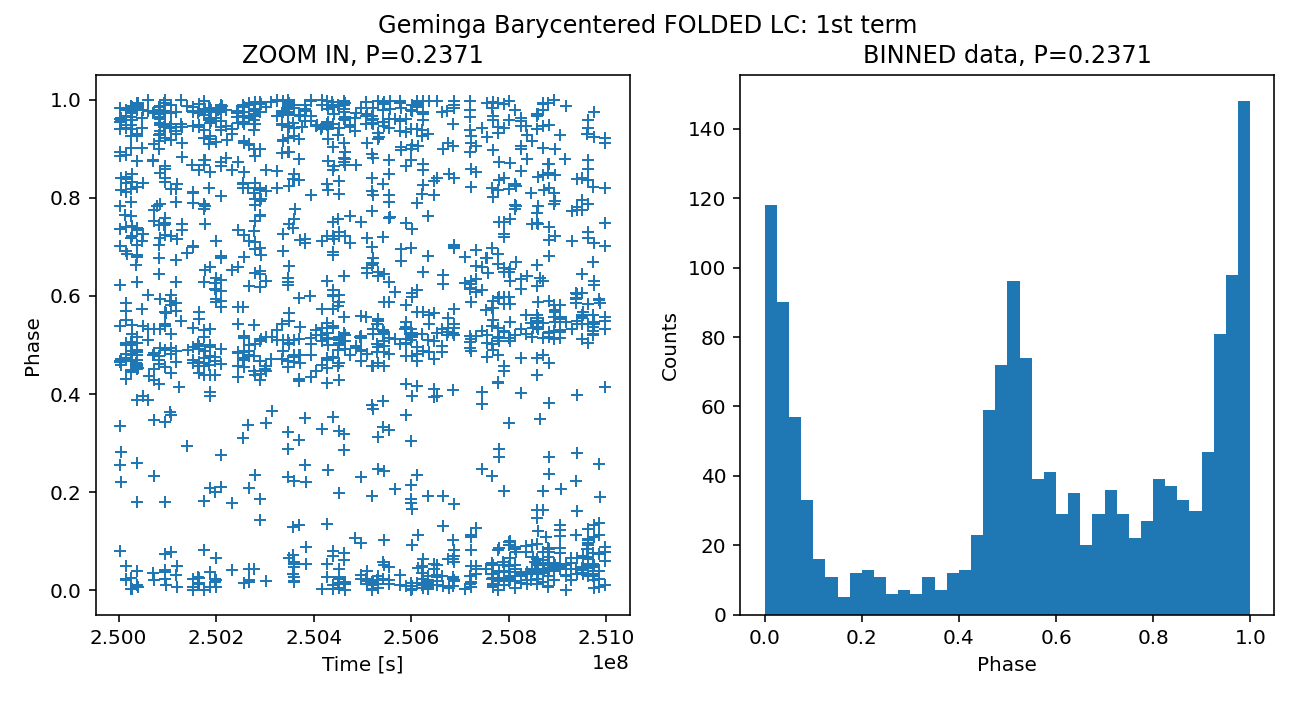

In [68]:
# ZOOM IN FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered FOLDED LC: 1st term')
ax[0].set(title='ZOOM IN, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
short = np.logical_and(roi_bary_dummy['TIME']>2.50e8,roi_bary_dummy['TIME']<2.51e8)
ax[0].plot(roi_bary_dummy['TIME'][short],roi_bary_dummy['PHASE'][short],'+')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy['PHASE'][short],40)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

In [66]:
# Attribute a PHASE to Geminga barycentered photons: 2nd order (and T_0)
period = 1/4.217567
f0 = 4.217567
f1 = -1.952503e-13
t0 = (54800-51910)*86400.

roi_bary_dummy2 = roi_bary.copy()
roi_bary_dummy2['PHASE'] = np.zeros(len(roi_bary_dummy2['TIME']))

for n,t in zip(roi_bary_dummy2.index,roi_bary_dummy2['TIME']):
    roi_bary_dummy2.loc[n,'PHASE'] = ((t-t0)*f0 + 0.5*((t-t0)**2)*f1)%1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


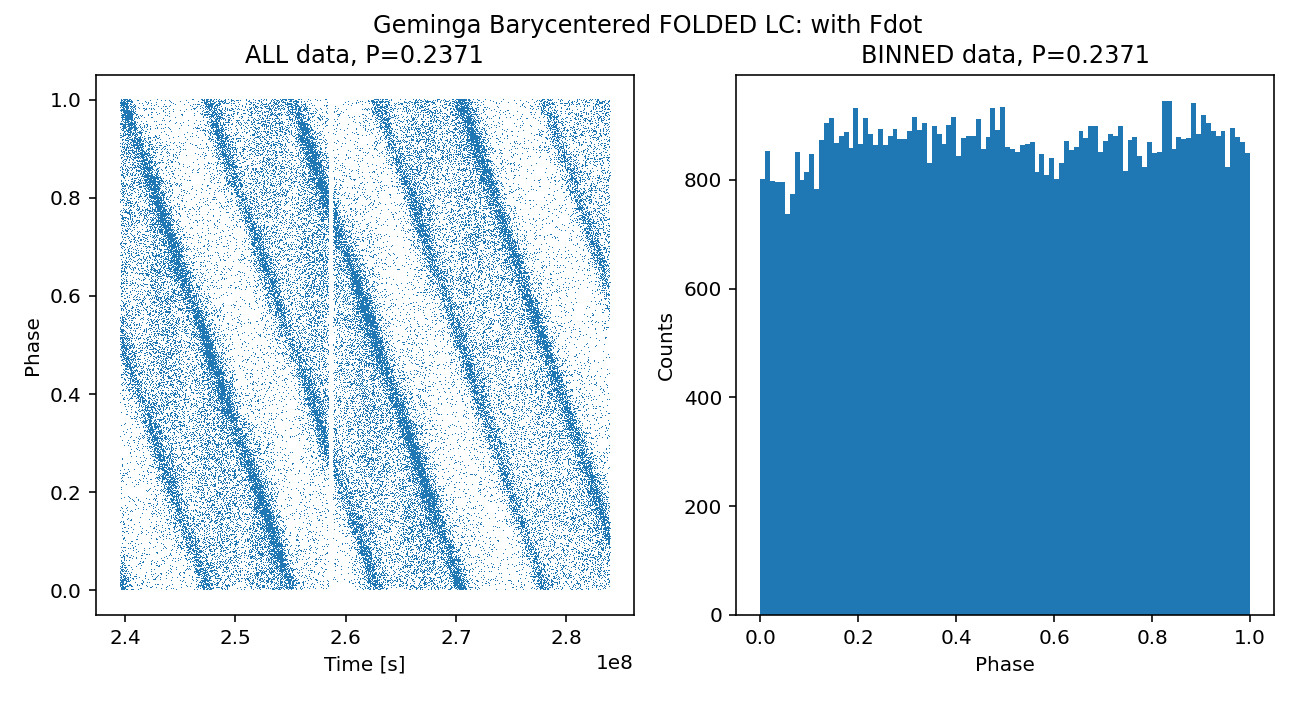

In [69]:
# Plot new FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered FOLDED LC: with Fdot')
ax[0].set(title='ALL data, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
ax[0].plot(roi_bary_dummy2['TIME'],roi_bary_dummy2['PHASE'],',')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy2['PHASE'],100)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


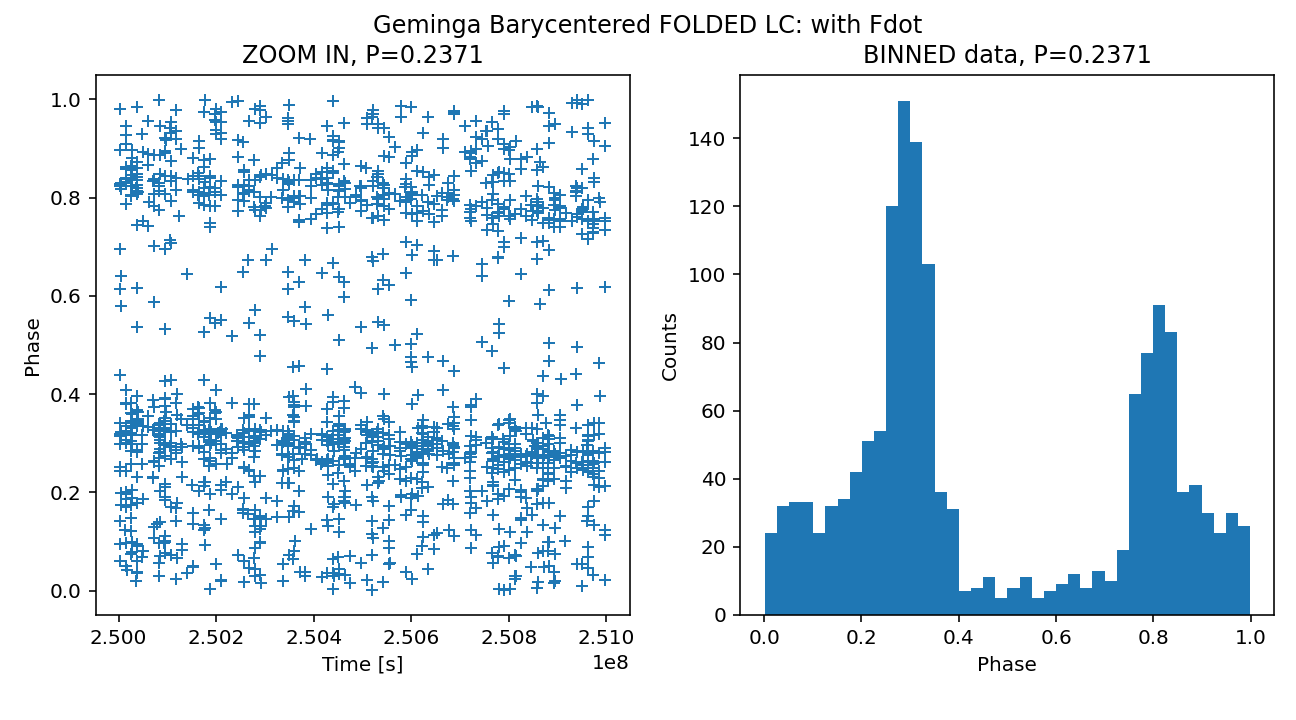

In [70]:
# ZOOMING FOLDED LC
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
fig.suptitle('Geminga Barycentered FOLDED LC: with Fdot')
ax[0].set(title='ZOOM IN, P=%.4f' % period, xlabel='Time [s]', ylabel='Phase')#, ylim=(-0.01,0.05))
short = np.logical_and(roi_bary_dummy2['TIME']>2.50e8,roi_bary_dummy2['TIME']<2.51e8)
ax[0].plot(roi_bary_dummy2['TIME'][short],roi_bary_dummy2['PHASE'][short],'+')

ax[1].set(title='BINNED data, P=%.4f' % period, xlabel='Phase', ylabel='Counts')#, ylim=(-0.0007,0.012))
ax[1].hist(roi_bary_dummy2['PHASE'][short],40)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# Look for Ephemeris database

https://fermi.gsfc.nasa.gov/ssc/data/access/lat/ephems/

![title](pics/database.png)

In [71]:
# Load photon files
db_file = 'data/database.fits'
fits.info(db_file)

Filename: data/database.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   ()      
  1  SPIN_PARAMETERS    1 BinTableHDU     80   1R x 18C   [32A, D, D, J, J, J, D, J, D, J, D, D, D, D, E, 4A, L, 32A]   
  2  ORBITAL_PARAMETERS    1 BinTableHDU     62   0R x 15C   [32A, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 32A]   
  3  REMARKS       1 BinTableHDU     29   0R x 5C   [32A, D, D, 128A, 4A]   
  4  OBSERVERS     1 BinTableHDU     25   0R x 4C   [4A, 128A, 128A, 1024A]   
  5  ALTERNATIVE_NAMES    1 BinTableHDU     21   0R x 2C   [32A, 32A]   


In [72]:
# LOAD data with PANDAS and look at the tables
#geminga_ft = fits.open(geminga_file)[1].data
#names = [name for name in geminga_ft.columns.names if len(geminga_ft[name].shape) <= 1]
db = Table.read(db_file,hdu=1).to_pandas()
db

PSRNAME         RA        DEC  VALID_SINCE  \
0  b'J0633+1746                      '  98.476204  17.770661        54628   

   VALID_UNTIL  EPOCH_INT  EPOCH_FRAC  TOAGEO_INT  TOAGEO_FRAC  TOABARY_INT  \
0        55196      54800         0.0           0          0.0        54819   

   TOABARY_FRAC        F0            F1   F2  RMS OBSERVER_CODE  BINARY_FLAG  \
0      0.843013  4.217567 -1.952503e-13  0.0  0.0       b'F   '        False   

                SOLAR_SYSTEM_EPHEMERIS  
0  b'JPL DE405                       '

We run now "gtpphase":
![title](pics/gtpphase_DB.png)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


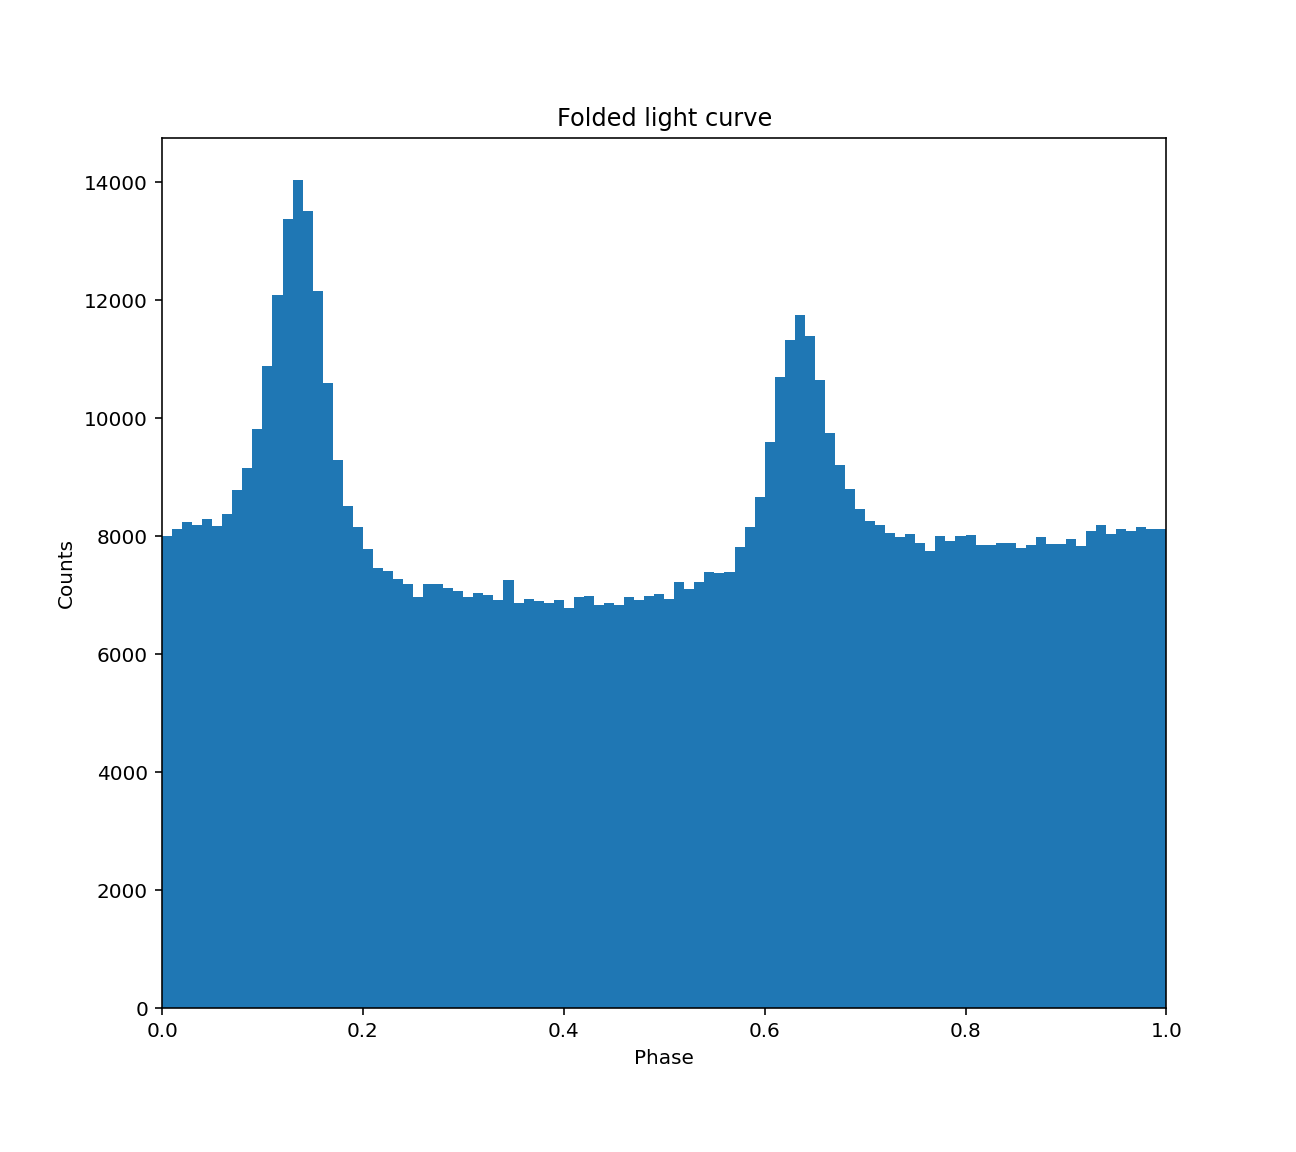

(array([ 8004.,  8115.,  8239.,  8189.,  8285.,  8167.,  8374.,  8782.,
         9154.,  9811., 10884., 12093., 13376., 14045., 13521., 12159.,
        10600.,  9299.,  8514.,  8158.,  7781.,  7458.,  7412.,  7268.,
         7182.,  6965.,  7189.,  7196.,  7127.,  7073.,  6967.,  7043.,
         7011.,  6916.,  7251.,  6872.,  6935.,  6900.,  6859.,  6921.,
         6787.,  6969.,  6993.,  6826.,  6866.,  6840.,  6974.,  6910.,
         6987.,  7021.,  6932.,  7218.,  7099.,  7215.,  7397.,  7378.,
         7391.,  7811.,  8149.,  8670.,  9593., 10702., 11332., 11744.,
        11395., 10641.,  9751.,  9201.,  8806.,  8453.,  8256.,  8185.,
         8055.,  7986.,  8039.,  7879.,  7753.,  8004.,  7922.,  8003.,
         8025.,  7854.,  7858.,  7884.,  7891.,  7800.,  7857.,  7983.,
         7866.,  7868.,  7952.,  7832.,  8092.,  8187.,  8045.,  8128.,
         8087.,  8158.,  8119.,  8117.]),
 array([6.63101673e-07, 1.00006416e-02, 2.00006201e-02, 3.00005986e-02,
        4.00005771e-02

In [76]:
# Plot the folded light curve profile
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='Folded light curve',xlabel='Phase',ylabel='Counts',xlim=(0,1))
ax.hist(geminga['PULSE_PHASE'],100)
#ax.hist(crop['PULSE_PHASE'],100)

If we do not have any database, we can manually input the Ephemeris, always via "gtpphase":
![title](pics/gtpphase_manual.png)

In [ ]:
'''
# Load photon files
geminga_file_man = 'data/Geminga_gtis.fits'
# LOAD data with PANDAS and look at the EVENT table
geminga_ft_man = fits.open(geminga_file)[1].data
names = [name for name in geminga_ft_man.columns.names if len(geminga_ft_man[name].shape) <= 1]
geminga_man = Table.read('data/Geminga_gtis.fits',hdu=1)
geminga_man = geminga_man[names].to_pandas()
geminga_man
'''

In [ ]:
'''
# Plot the folded light curve profile
nbin = 100
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='Folded light curve MANUALLY',xlabel='Phase',ylabel='Counts',xlim=(0,1))
ax.hist(geminga_man['PULSE_PHASE'],nbin)

# Define ON-PULSE, OFF-PULSE & INTER-PULSE:
off_pulse   = np.logical_and(geminga['PULSE_PHASE']>0.22,geminga['PULSE_PHASE']<0.58)
on_pulse    = np.logical_and(geminga['PULSE_PHASE']>0.22,geminga['PULSE_PHASE']<0.58)
inter_pulse = np.logical_or(geminga['PULSE_PHASE']<0.05,geminga['PULSE_PHASE']>0.72)
ax.axvline(0.05,ls=':',color='r', linewidth=4)
ax.axvline(0.22,ls=':',color='r', linewidth=4)
ax.axvline(0.58,ls=':',color='r', linewidth=4)
ax.axvline(0.72,ls=':',color='r', linewidth=4)
ax.axhline(np.sum(off_pulse)/(100*(0.58-0.22)),xmin=0.22, xmax=0.58,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)), xmax=0.05,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)),xmin=0.72,ls=':',color='k', linewidth=4)
'''

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


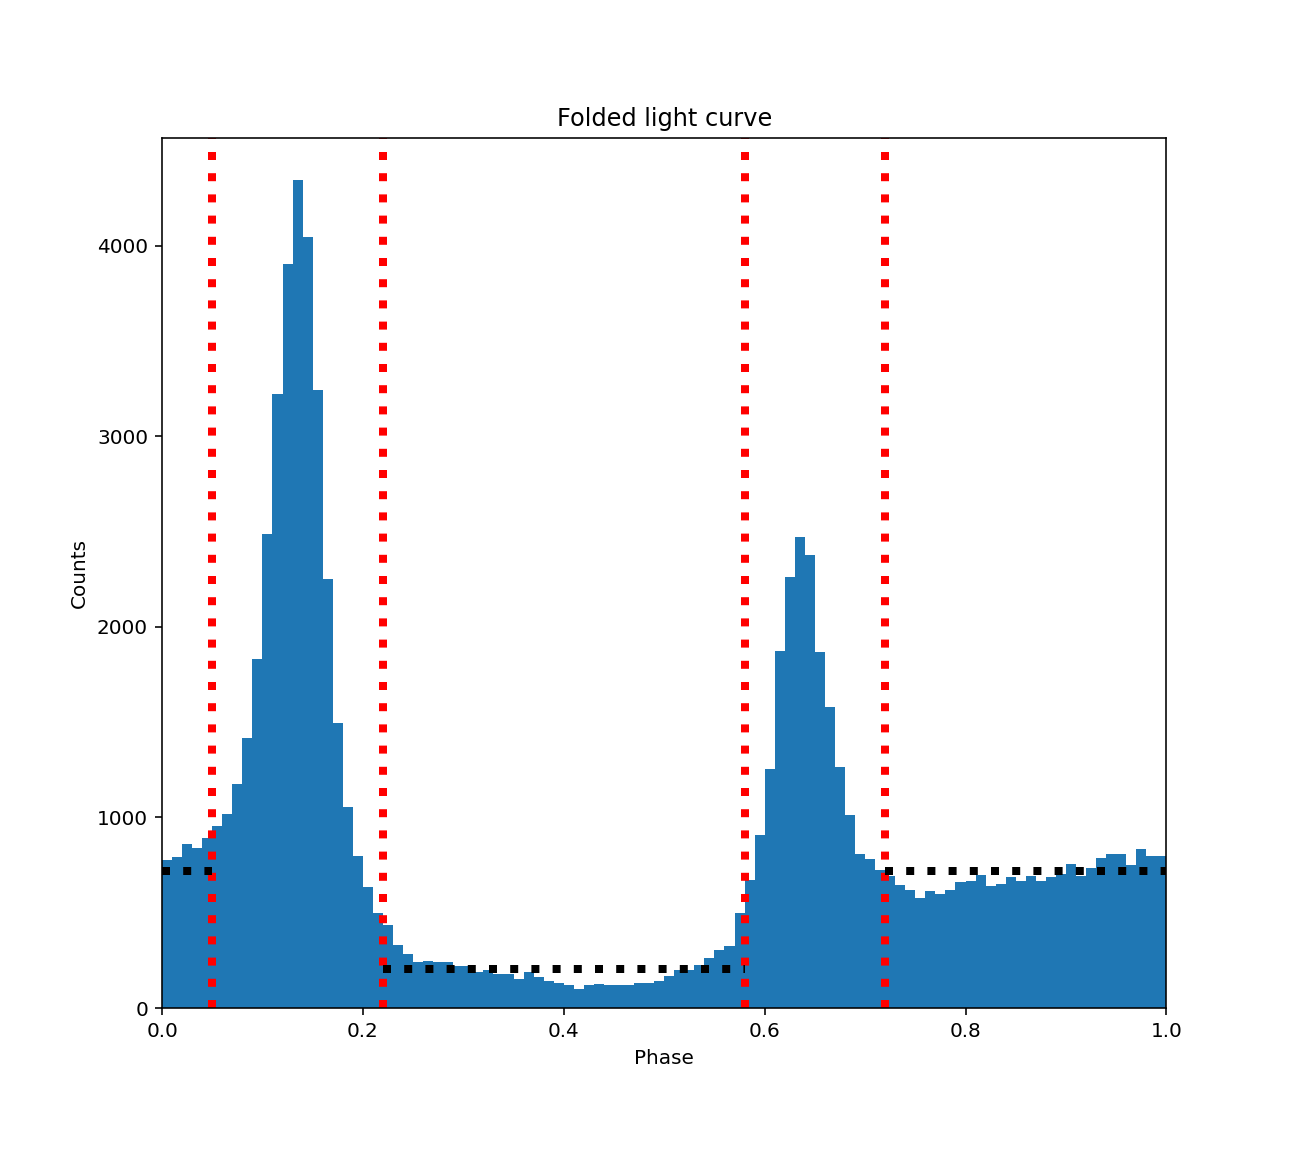

In [77]:
# Plot the folded light curve profile
nbin = 100
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,8))
ax.set(title='Folded light curve',xlabel='Phase',ylabel='Counts',xlim=(0,1))
ax.hist(crop['PULSE_PHASE'],nbin)

# Define ON-PULSE, OFF-PULSE & INTER-PULSE:
off_pulse   = np.logical_and(crop['PULSE_PHASE']>0.22,crop['PULSE_PHASE']<0.58)
on_pulse    = np.logical_and(crop['PULSE_PHASE']>0.22,crop['PULSE_PHASE']<0.58)
inter_pulse = np.logical_or( crop['PULSE_PHASE']<0.05,crop['PULSE_PHASE']>0.72)
ax.axvline(0.05,ls=':',color='r', linewidth=4)
ax.axvline(0.22,ls=':',color='r', linewidth=4)
ax.axvline(0.58,ls=':',color='r', linewidth=4)
ax.axvline(0.72,ls=':',color='r', linewidth=4)
ax.axhline(np.sum(off_pulse)/(100*(0.58-0.22)),xmin=0.22, xmax=0.58,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)), xmax=0.05,ls=':',color='k', linewidth=4)
ax.axhline(np.sum(inter_pulse)/(100*(0.05+1-0.72)),xmin=0.72,ls=':',color='k', linewidth=4)

"gtpphase":
![title](pics/pulse_profile.png)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


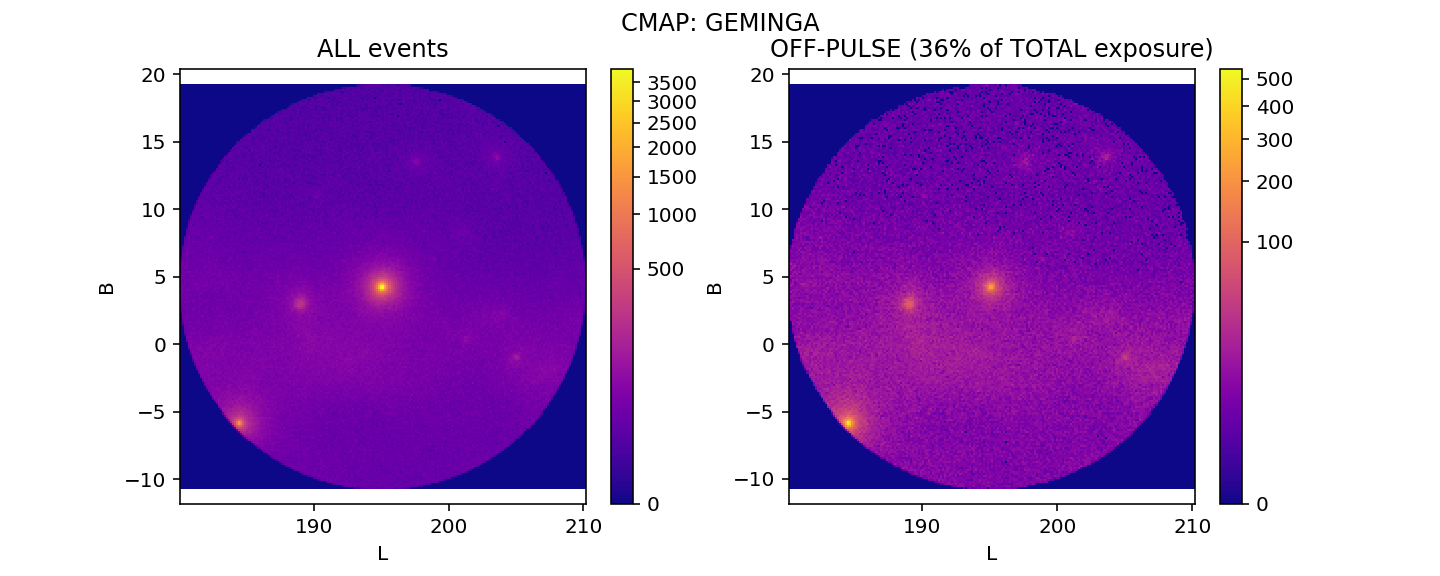

In [83]:
# We can now plot a count map of the events
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle('CMAP: GEMINGA')
ax[0].set(title='ALL events',xlabel='L',ylabel='B')
h = ax[0].hist2d(geminga['L'],geminga['B'],200, cmap='plasma', norm=colors.PowerNorm(0.3) )# norm=colors.LogNorm())
ax[0].axis('equal')
fig.colorbar(h[3], ax=ax[0], orientation='vertical')

off_pulse   = np.logical_and(geminga['PULSE_PHASE']>0.22,geminga['PULSE_PHASE']<0.58)
on_pulse    = np.logical_and(geminga['PULSE_PHASE']>0.22,geminga['PULSE_PHASE']<0.58)
inter_pulse = np.logical_or( geminga['PULSE_PHASE']<0.05,geminga['PULSE_PHASE']>0.72)

ax[1].set(title='OFF-PULSE (36% of TOTAL exposure)',xlabel='L',ylabel='B')
h = ax[1].hist2d(geminga['L'][off_pulse],geminga['B'][off_pulse],200, cmap='plasma', norm=colors.PowerNorm(0.3) )# norm=colors.LogNorm())
ax[1].axis('equal')
fig.colorbar(h[3], ax=ax[1], orientation='vertical')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


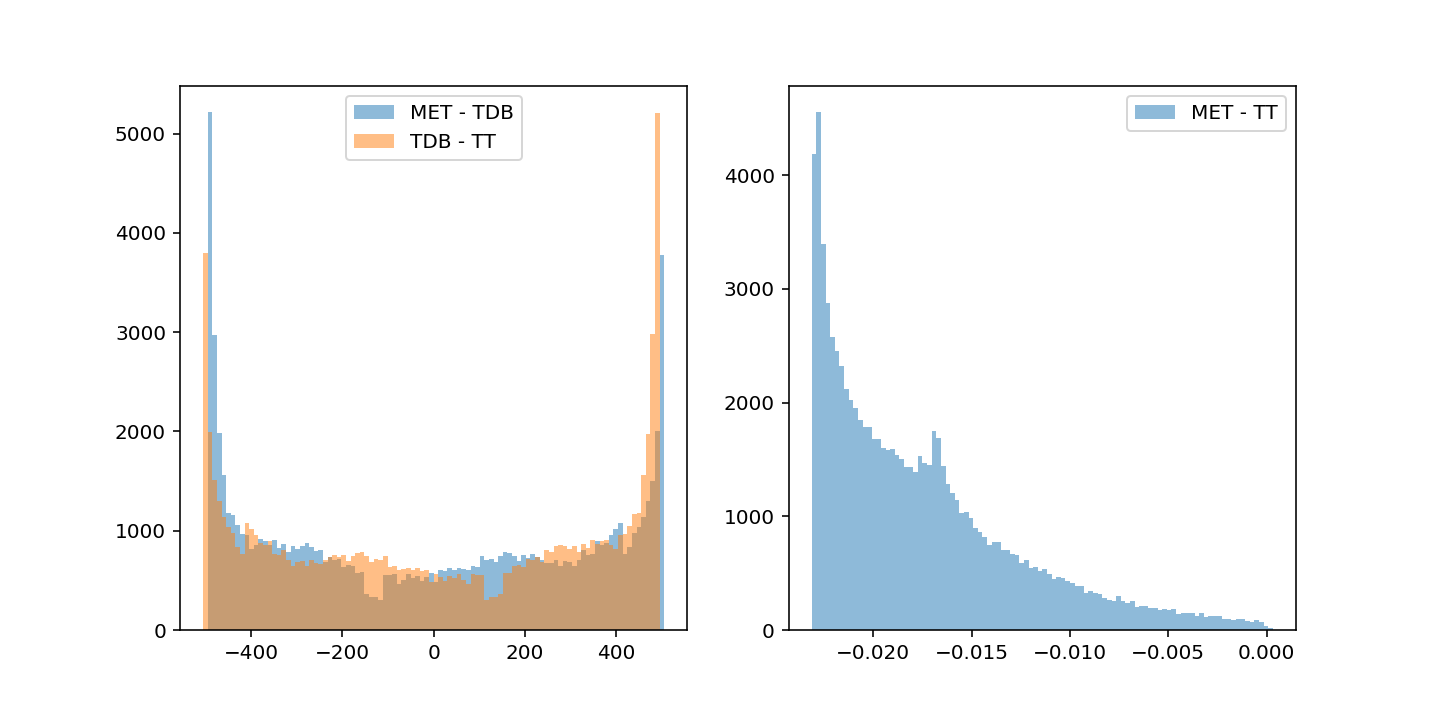

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


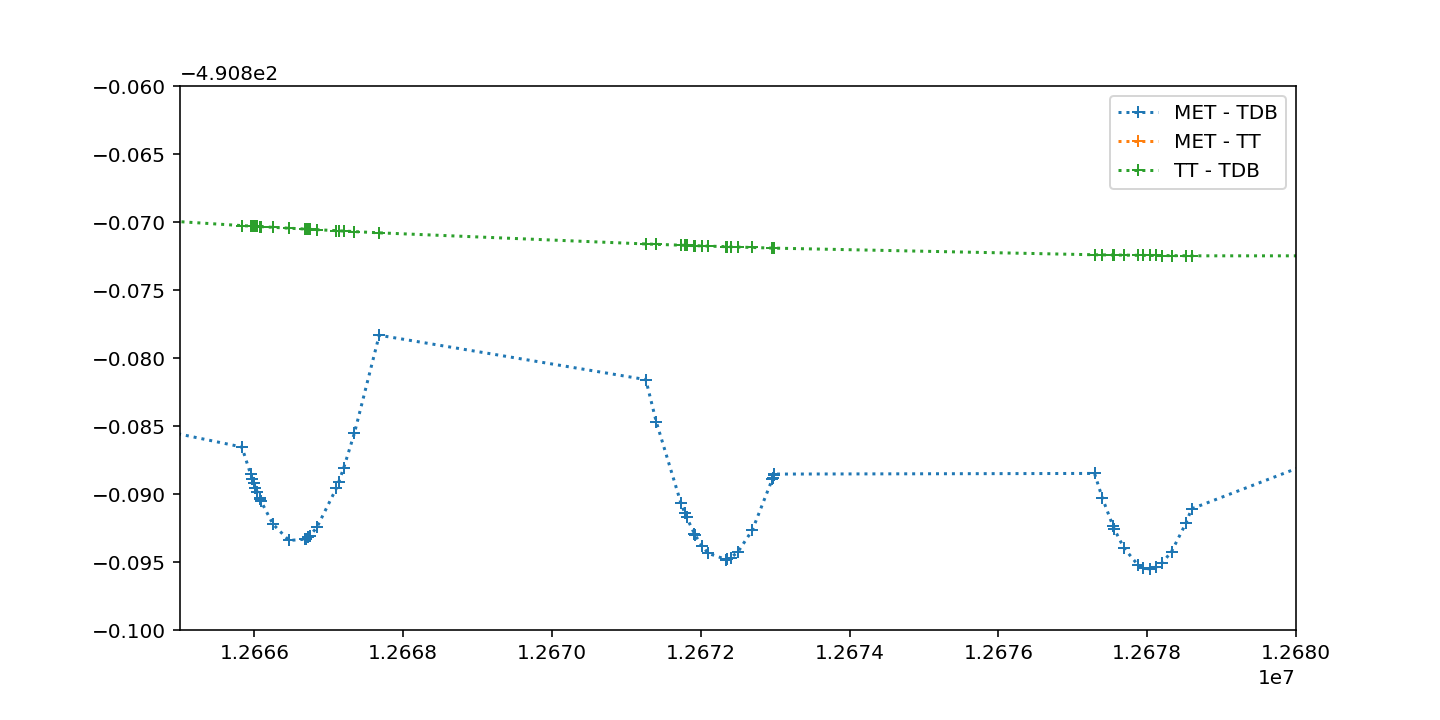

In [88]:
# Getting back to System references
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
h1 = ax[0].hist(roi['TIME']-roi_bary['TIME'],     range=(-505,505), bins=100, alpha=0.5, label='MET - TDB')
h2 = ax[0].hist(roi_bary['TIME']-roi_geo['TIME'], range=(-505,505), bins=100, alpha=0.5, label='TDB - TT')
h3 = ax[1].hist(roi['TIME']-roi_geo['TIME'],      bins=100, alpha=0.5, label='MET - TT')
ax[0].legend()
ax[1].legend()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_bary['TIME'],    ':+', label='MET - TDB')
ax.plot(roi['TIME']-roi['TIME'].min(),roi['TIME']-roi_geo['TIME'],     ':+', label='MET - TT')
ax.plot(roi['TIME']-roi['TIME'].min(),roi_geo['TIME']-roi_bary['TIME'],':+',label='TT - TDB')
#ax.set(xlim=(9.694e6,9.702e6), ylim=(-0.025,-0.005))
ax.set(xlim=(1.2665e7,1.268e7), ylim=(-490.90,-490.86))
ax.legend()

In [89]:
# Funny EXTRA...
# ...A way to estimate the satellite ORBIT DURATION
x = roi['TIME']-roi['TIME'].min()
orbit1 = np.logical_and(x>1.2665e7,x<1.2668e7)
orbit2 = np.logical_and(x>1.267e7,x<1.2674e7)

y1 = (roi['TIME']-roi_geo['TIME'])[orbit1].min()
for i,j in zip(roi['TIME'][orbit1].index,(roi['TIME']-roi_geo['TIME'])[orbit1]):
    if j==y1:
        print('Min value at index %s, corresponding to time %s sec' % (i,roi['TIME'][i]))
y2 = (roi['TIME']-roi_geo['TIME'])[orbit2].min()
for k,j in zip(roi['TIME'][orbit2].index,(roi['TIME']-roi_geo['TIME'])[orbit2]):
    if j==y2:
        print('Min value at index %s, corresponding to time %s sec' % (k,roi['TIME'][k]))
orbit_sec = (roi['TIME'][k]-roi['TIME'][i])
print('Orbit duration: %.2f sec = %.2f min = %.2f hour' % (orbit_sec,orbit_sec/60,orbit_sec/3600))

Min value at index 26102, corresponding to time 252229021.0398862 sec
Min value at index 26123, corresponding to time 252234900.4928299 sec
Orbit duration: 5305.09 sec = 88.42 min = 1.47 hour


Note: Since the pulsar location is needed to calculate photon travel time between the spacecraft and the geocenter, in principle everything after a geocentric conversion depends on the pulsar location.

TT = TAI (International Atomic Time) + 32.184 s

TAI = UTC + 32 s at January 1.0, 2001, UTC

Approximately, TDB = TT + 1.658 ms × sin g + 0.014 ms × sin 2g, where g is a mean anomaly of the center of gravity of the Earth-Moon system around the Sun. More precise estimate is necessary to meet the requirement on absolute time accuracy for Fermi (formerly GLAST).

The solar system barycenter is located near the surface of the Sun, which is 2.3 light-second away from the center of the Sun.

For micro-second precision timing, relativistic effects are not negligible. Such effects include: the Shapiro delay in the solar system, aberration due to the motion of the spacecraft around the Earth and the motion of the Earth around the Sun, and relativistic delay at the source (for binary pulsars only).

Also see Goddard Space Flight Center's "A Time Tutorial" in "The ABC of XTE" for basic information about temporal analyses.

## ...Play with the notebook... and have FUN...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,9))

for n in [1,2,3]:
    dt = 0.01*n
    t = np.arange(0, 10, dt)
    nse = np.random.randn(len(t))
    r = np.exp(-t / 0.05)
    cnse = np.convolve(nse, r) * dt
    cnse = cnse[:len(t)]
    s = 0.1 * np.sin(2 * np.pi *t) + cnse
    ax[0].plot(t, s, label=n)
    ax[1].psd(s, 512, 1 / dt, label=n)
ax[0].legend()
ax[1].legend()

In [ ]:
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(9,5))

for dt in [0.005,0.01,0.02,0.03]:
    t = np.arange(0, 10, dt)
    nse = np.random.randn(len(t))
    ax1[0,0].set_title('nse = np.random.randn(len(t))')
    ax1[0,0].plot(nse)
    
    r = np.exp(-t / 0.05)
    ax1[0,1].set_title('r = np.exp(-t / 0.05)')
    ax1[0,1].loglog(t,r)
    
    cnse = np.convolve(nse, r) * dt
    ax1[1,0].set_title('cnse = np.convolve(nse, r) * dt')
    ax1[1,0].plot(cnse)
    
    cnse = cnse[:len(t)]
    ax1[2,0].set_title('cnse = cnse[:len(t)]')
    ax1[2,0].plot(cnse)
    
    s = 0.1 * np.sin(2 * np.pi * t) + cnse
    ax1[1,1].set_title('s = 0.1 * np.sin(2 * np.pi * t) + cnse')
    ax1[1,1].plot(s)
    
    ax1[2,1].set_title('t,s')
    ax1[2,1].plot(t, s)
    
    ax2.set_title('psd(s, 512, 1 / dt)')
    ax2.psd(s, 512, 1 / dt,label=dt)
ax2.legend()

In [ ]:
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(9,10))
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(9,5))

for n in [1,2,3]:
    dt = 0.01
    t = np.arange(0, 10, dt)
    nse = np.random.randn(len(t))
    ax1[0,0].set_title('nse = np.random.randn(len(t))')
    ax1[0,0].plot(nse)
    
    r = np.exp(-t / 0.05)
    ax1[0,1].set_title('r = np.exp(-t / 0.05)')
    ax1[0,1].loglog(t,r)
    
    cnse = np.convolve(nse, r) * dt
    ax1[1,0].set_title('cnse = np.convolve(nse, r) * dt')
    ax1[1,0].plot(cnse)
    
    cnse = cnse[:len(t)]
    ax1[2,0].set_title('cnse = cnse[:len(t)]')
    ax1[2,0].plot(cnse)
    
    s = 0.1 * np.sin(2 * np.pi * t) + cnse
    ax1[1,1].set_title('s = 0.1 * np.sin(2 * np.pi * t) + cnse')
    ax1[1,1].plot(s)
    
    ax1[2,1].set_title('t,s')
    ax1[2,1].plot(t[::n], s[::n])
    
    ax2.set_title('psd(s, 512, 1 / dt)')
    ax2.psd(s[::n], 512, 1 / (dt*n),label=n)
ax2.legend()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

for frac_points in [0.9]:
    for w in [1,2,3]:
        for nin in [1000]:
            A = 2.
            phi = 0.5 * np.pi
#            nin = 1000
            nout = 100000
#            frac_points = 0.9 # Fraction of points to select
            
            #Randomly select a fraction of an array with timesteps:
            r = np.random.rand(nin)
#            x = np.linspace(0.01, 10*np.pi, nin)
            x = np.linspace(0.01, 10, nin)
            x = x[r >= frac_points]
            
            #Plot a sine wave for the selected times:
            y = A * np.sin(w*x+phi) + 1*r[r >= frac_points]
            
            #Define the array of frequencies for which to compute the periodogram:
            f = np.linspace(0.01, 10, nout)
            
            #Calculate Lomb-Scargle periodogram:
            pgram = signal.lombscargle(x, y, f, normalize=True)
            
            #Now make a plot of the input data:
            ax[0].plot(x, y, '+:', label='w=%s f=%s n=%s' %(w,frac_points,nin))
            
            #Then plot the normalized periodogram:
            ax[1].plot(f, pgram, label='w=%s f=%s n=%s' %(w,frac_points,nin))
ax[0].legend()
ax[1].legend()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))

for frac_points in [0.9]:
    for w in [1,2,3]:
        for nin in [1000]:
            for phi in [0.5* np.pi]:#[0.4* np.pi,0.5* np.pi,0.6* np.pi]:
                for A in [2]:
#                    A = 2.
#                    phi = 0.5 * np.pi
        #            nin = 1000
                    nout = 100000
        #            frac_points = 0.9 # Fraction of points to select
                    
                    #Randomly select a fraction of an array with timesteps:
                    r = np.random.rand(nin)
                    x = np.linspace(0.01, 10*np.pi, nin)
                    x = x[r >= frac_points]
                    
                    #Plot a sine wave for the selected times:
                    y = A * np.sin(w*x+phi) #+ 1*r[r >= frac_points]
                    
                    #Define the array of frequencies for which to compute the periodogram:
                    f = np.logspace(-1, 2, nout)
#                    f = np.linspace(0.01, 2, nout)
                    
                    #Calculate Lomb-Scargle periodogram:
                    pgram = signal.lombscargle(x, y, f, normalize=True)
                    
                    #Now make a plot of the input data:
                    ax[0].plot(x, y, '+:', label='w=%s A=%s' %(w,A))
                    
                    #Then plot the normalized periodogram:
                    ax[1].plot(f, pgram, label='w=%s A=%s' %(w,A))
ax[0].legend()
ax[1].legend()
/print len(x)
/print len(f)

In [ ]:
fs = 10e3
N = 1e3
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
plt.subplots()
plt.plot(x)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
plt.subplots()
plt.plot(x)
f, Pxx_den = signal.periodogram(x, fs)
plt.subplots()
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
f, Pxx_den = signal.periodogram(x, fs)
plt.subplots()
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
def findpeaks(series, DELTA):
    """
    Finds extrema in a pandas series data.

    Parameters
    ----------
    series : `pandas.Series`
        The data series from which we need to find extrema.

    DELTA : `float`
        The minimum difference between data values that defines a peak.

    Returns
    -------
    minpeaks, maxpeaks : `list`
        Lists consisting of pos, val pairs for both local minima points and
        local maxima points.
    """
    # Set inital values
    mn, mx = np.Inf, -np.Inf
    minpeaks = []
    maxpeaks = []
    lookformax = True
    start = True
    # Iterate over items in series
    for time_pos, value in series.iteritems():
        if value > mx:
            mx = value
            mxpos = time_pos
        if value < mn:
            mn = value
            mnpos = time_pos
        if lookformax:
            if value < mx-DELTA:
                # a local maxima
                maxpeaks.append((mxpos, mx))
                mn = value
                mnpos = time_pos
                lookformax = False
            elif start:
                # a local minima at beginning
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                start = False
        else:
            if value > mn+DELTA:
                # a local minima
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                lookformax = True
    # check for extrema at end
    if value > mn+DELTA:
        maxpeaks.append((mxpos, mx))
    elif value < mx-DELTA:
        minpeaks.append((mnpos, mn))
    return minpeaks, maxpeaks

In [ ]:
#series = my_timeseries.data['sunspot SWO']
series = vela['RATE']
minpeaks, maxpeaks = findpeaks(series, DELTA=0.02)
# Plotting the figure and extremum points
fig, ax = plt.subplots()
ax.set_ylabel('LC')
ax.set_xlabel('Time')
ax.set_title('Peaks in TimeSeries')
ax.plot(series)
ax.scatter(*zip(*minpeaks), color='red', label='min')
ax.scatter(*zip(*maxpeaks), color='green', label='max')
ax.legend()
ax.grid(True)

#ax.set_xlim(13700,14300)
#ax.set_ylim(-0.02,0.06)

plt.show()

In [ ]:
#freq, spectra = signal.periodogram(vela['RATE'], fs=0.25)
freq, spectra = signal.periodogram(vela['RATE'], fs=1/(8.9*86400))

fig, ax = plt.subplots()
plt.semilogy(freq, spectra)
plt.title(f'Power Spectrum of {rate}')
plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.show()